In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import datetime 
import pandas as pd
import os
import sqlite3
from sqlite3 import Error
from sqlalchemy import create_engine

In [2]:
# upload csv
df = pd.read_csv("Sample-Superstore.csv", encoding = "latin1")

# Data Wrangling

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
# check unique values
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [6]:
# Check for duplicates in OrderID and ProductID
duplicates = df[df.duplicated(subset=["Order ID", "Product ID"], keep=False)]

# Display duplicates
duplicates[["Order ID", "Product ID", "Discount","Sales", "Ship Mode"]]

,Order ID,Product ID,Discount,Sales,Ship Mode
350,CA-2016-129714,OFF-PA-10001970,0.0,24.560,First Class
352,CA-2016-129714,OFF-PA-10001970,0.0,49.120,First Class
430,US-2016-123750,TEC-AC-10004659,0.2,408.744,Standard Class
431,US-2016-123750,TEC-AC-10004659,0.2,291.960,Standard Class
1300,CA-2016-137043,FUR-FU-10003664,0.0,572.760,Second Class
1301,CA-2016-137043,FUR-FU-10003664,0.0,286.380,Second Class
3183,CA-2017-152912,OFF-ST-10003208,0.0,1633.140,Second Class
3184,CA-2017-152912,OFF-ST-10003208,0.0,544.380,Second Class
3405,US-2014-150119,FUR-CH-10002965,0.3,281.372,Standard Class
3406,US-2014-150119,FUR-CH-10002965,0.3,281.372,Standard Class


In [7]:
# Check for duplicates in customer and address
duplicates = df[df.duplicated(subset=["Customer ID", "Region", "State","City", "Postal Code"], keep=False)]
duplicates

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,9988,CA-2017-163629,11/17/2017,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.9900,1,0.00,28.7964
9988,9989,CA-2017-163629,11/17/2017,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.1000,5,0.00,55.6470
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932


In [8]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Data preparation to work with SQLite

In [9]:
# import os

# # Delete the old database file if it exists
# if os.path.exists("superstore.db"):
#     os.remove("superstore.db")


## Connection

In [10]:
# Create a fresh SQLite connection
conn = sqlite3.connect("superstore.db")
cursor = conn.cursor()


## Tables

In [11]:
# # Create Tables
# cursor.executescript('''
# -- Regions Table
# CREATE TABLE Regions (
#     RegionID INTEGER PRIMARY KEY AUTOINCREMENT,
#     RegionName VARCHAR(50),
#     State VARCHAR(50),
#     City VARCHAR(100),
#     PostalCode INT
# );

# -- Customers Table
# CREATE TABLE Customers (
#     CustomerID VARCHAR(20) PRIMARY KEY,
#     CustomerName VARCHAR(100),
#     Segment VARCHAR(50),
#     RegionID INT,
#     FOREIGN KEY (RegionID) REFERENCES Regions(RegionID)
# );

# -- Categories Table
# CREATE TABLE Categories (
#     CategoryID INTEGER PRIMARY KEY AUTOINCREMENT,
#     CategoryName VARCHAR(50)
# );

# -- Products Table
# CREATE TABLE Products (
#     ProductID VARCHAR(20) PRIMARY KEY,
#     ProductName VARCHAR(255),
#     CategoryID INT,
#     SubCategory VARCHAR(50),
#     FOREIGN KEY (CategoryID) REFERENCES Categories(CategoryID)
# );

# -- Shipping Table
# CREATE TABLE Shipping (
#     ShipID INTEGER PRIMARY KEY AUTOINCREMENT,
#     ShipMode VARCHAR(50),
#     ShipDate DATE
# );

# -- Orders Table
# CREATE TABLE Orders (
#     OrderID VARCHAR(20) PRIMARY KEY,
#     OrderDate DATE,
#     CustomerID VARCHAR(20),
#     ShipID INT,
#     FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID),
#     FOREIGN KEY (ShipID) REFERENCES Shipping(ShipID)
# );

# -- Order Details Table
# CREATE TABLE OrderDetails (
#     OrderDetailID INTEGER PRIMARY KEY AUTOINCREMENT,
#     OrderID VARCHAR(20),
#     ProductID VARCHAR(20),
#     Sales DECIMAL(10,2),
#     Quantity INT,
#     Discount DECIMAL(5,2),
#     Profit DECIMAL(10,2),
#     FOREIGN KEY (OrderID) REFERENCES Orders(OrderID),
#     FOREIGN KEY (ProductID) REFERENCES Products(ProductID)
# );
# ''')

# # Commit and close connection
# conn.commit()
# conn.close()


#FIXME 
- add product unit price to products (and remove sales)
- fix shipping 
- add subcategory to the categories table, and make a unique code that relates both. Take sub cat from products
- when we have many to many relationship we create a juntction table: we should do this when relating customers with address table: some customers have multiple address, some addresses (region id) may have multiple customers

## Populating the tables

In [12]:
#NOTE - sqlalchemy.create_engine is used to create a connection to the SQLite database in a more flexible way, allowing pandas to directly write (to_sql) and read (read_sql) data.


# ## fixing date columns #NOTE - # order date and ship date are formatted as dd/mm/yyyy, and to extract year or month from date with sqlite i need to reformat
# to yyyy/mm/dd. It would be possible to do it with sqlite, but the main issue is that same dates are shown like this:
# # d/mm/yyyy or dd/m/yyyy, which makes it extra hard to fix with sqlite

# df["Order Date"] = pd.to_datetime(df["Order Date"], format='mixed')
# df["Ship Date"] = pd.to_datetime(df["Ship Date"], format='mixed')
# df["Order Date"] = df["Order Date"].astype(str)
# df["Ship Date"] = df["Ship Date"].astype(str)

# # Drop Row ID since it doesnt have any meaningful role in relationships / prevent errors
# df.drop(columns=["Row ID"], inplace=True)

# Connect to SQLite
engine = create_engine("sqlite:///superstore.db")

# # ### Insert Data into Regions ###
# regions_df = df[['Region', 'State', 'City', 'Postal Code']].drop_duplicates().rename(
#     columns={'Region': 'RegionName', 'Postal Code': 'PostalCode'}
# # )
# regions_df.to_sql('Regions', con=engine, if_exists='append', index=False)

# ### Insert Data into Customers ###
# customers_df = df[['Customer ID', 'Customer Name', 'Segment', 'Region', 'State', 'City', 'Postal Code']].drop_duplicates().rename(columns={"Region":"RegionName", "Postal Code":"PostalCode"})
# regions_df = pd.read_sql("SELECT * FROM Regions", con=engine)  # Fetch Region IDs
# customers_df = customers_df.merge(
#     regions_df, on=['RegionName', 'State', 'City', 'PostalCode'], how='left'
# ).drop(columns=['RegionName', 'State', 'City', 'PostalCode'])
# customers_df.rename(columns={'Customer ID': 'CustomerID', 'Customer Name': 'CustomerName'}, inplace=True)
# ### **Drop duplicates by CustomerID after merging**
# customers_df = customers_df.drop_duplicates(subset=['CustomerID'])
# customers_df.to_sql('Customers', con=engine, if_exists='append', index=False)

# ### Insert Data into Categories ###
# categories_df = df[['Category']].drop_duplicates().rename(columns={'Category': 'CategoryName'})
# categories_df.to_sql('Categories', con=engine, if_exists='append', index=False)

# ### Insert Data into Products ###
# products_df = df[['Product ID', 'Product Name', 'Category', 'Sub-Category']].drop_duplicates().rename(
#     columns={"Sub-Category":"SubCategory"}
# )
# categories_df = pd.read_sql("SELECT * FROM Categories", con=engine)  # Fetch Category IDs
# products_df = products_df.merge(categories_df, left_on='Category', right_on='CategoryName', how='left').drop(columns=['Category', 'CategoryName'])
# products_df.rename(columns={'Product ID': 'ProductID', 'Product Name': 'ProductName'}, inplace=True)
# products_df = products_df.drop_duplicates(subset=['ProductID'])
# products_df.to_sql('Products', con=engine, if_exists='append', index=False)

# # ### Insert Data into Shipping ###
# shipping_df = df[['Ship Mode', 'Ship Date']].drop_duplicates().rename(columns={"Ship Mode": "ShipMode", "Ship Date":"ShipDate"})
# shipping_df.to_sql('Shipping', con=engine, if_exists='append', index=False)

# # ### Insert Data into Orders ###
# orders_df = df[['Order ID', 'Order Date', 'Customer ID', 'Ship Mode', 'Ship Date']].drop_duplicates().rename(
#     columns={"Ship Mode": "ShipMode", "Ship Date":"ShipDate"})
# shipping_df = pd.read_sql("SELECT * FROM Shipping", con=engine)  # Fetch Ship IDs
# orders_df = orders_df.merge(shipping_df, on=['ShipMode', 'ShipDate'], how='left').drop(columns=['ShipMode', 'ShipDate'])
# orders_df.rename(columns={'Order ID': 'OrderID', 'Order Date': 'OrderDate', 'Customer ID': 'CustomerID'}, inplace=True)
# orders_df.to_sql('Orders', con=engine, if_exists='append', index=False)

# # ### Insert Data into OrderDetails ###
# order_details_df = df[['Order ID', 'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
# order_details_df.rename(columns={'Order ID': 'OrderID', 'Product ID': 'ProductID'}, inplace=True)
# order_details_df.to_sql('OrderDetails', con=engine, if_exists='append', index=False)

# print("✅ Database successfully created and loaded!")



# Queries

## Category generating the maximum sales revenue


In [13]:
query ="""
SELECT CategoryName, sum(Sales) as revenue
FROM Products p
JOIN OrderDetails o ON p.ProductID = o.ProductID
JOIN Categories c ON c.CategoryID = p.CategoryID
GROUP BY CategoryName
ORDER BY revenue DESC
LIMIT 1
"""
pd.read_sql(query, con=engine)



,CategoryName,revenue
0,Technology,836154.033


In [14]:
df.groupby("Category")["Sales"].sum()

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

##  the profit in this category


In [15]:
query ="""
SELECT CategoryName, sum(Sales) as revenue, sum(Profit)
FROM Products p
JOIN OrderDetails o ON p.ProductID = o.ProductID
JOIN Categories c ON c.CategoryID = p.CategoryID
GROUP BY CategoryName
ORDER BY revenue DESC
LIMIT 1
"""
pd.read_sql(query, con=engine)

,CategoryName,revenue,sum(Profit)
0,Technology,836154.033,145454.9481


## Profit per category

In [16]:
# Are they making a loss in any categories?
# Profit margin tells how much profit is made for each dollar of revenue.
query ="""
SELECT 
    CategoryName, 
    sum(Sales) as Revenue, 
    sum(Profit) as Profit,
    (SUM(o.Profit) / SUM(o.Sales)) * 100 AS ProfitMargin
FROM Products p
JOIN OrderDetails o ON p.ProductID = o.ProductID
JOIN Categories c ON c.CategoryID = p.CategoryID
GROUP BY CategoryName
ORDER BY Profit DESC
"""
pd.read_sql(query, con=engine)

,CategoryName,Revenue,Profit,ProfitMargin
0,Technology,836154.0330,145454.9481,17.395712
1,Office Supplies,719047.0320,122490.8008,17.035158
2,Furniture,741999.7953,18451.2728,2.486695


In [135]:
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()

In [136]:
# total revenue per category
revenue_per_category = df.groupby("Category")["Sales"].sum().reset_index()
profit_per_category = df.groupby("Category")["Profit"].sum().reset_index()

In [132]:
revenue_per_category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


In [140]:
revenue_per_category["revenue_%"] = revenue_per_category["Sales"] / total_sales
revenue_per_category["profit_%"] = profit_per_category["Profit"] / total_profit

In [141]:
revenue_per_category

,Category,Sales,revenue_%,profit_%
0,Furniture,741999.7953,0.323002,0.064426
1,Office Supplies,719047.0320,0.313010,0.427696
2,Technology,836154.0330,0.363988,0.507879


In [17]:
# avg revenue per category
df.groupby("Category")["Sales"].median()

Category
Furniture          182.220
Office Supplies     27.418
Technology         166.160
Name: Sales, dtype: float64

#NOTE - Despite having the highest median revenue, furniture has a really low profit margin, considering the amount of revenue it generates
# 

## Segments generating most profit

In [18]:
query ="""
SELECT 
    Segment, 
    sum(Sales) as Revenue, 
    sum(Profit) as Profit,
    (SUM(od.Profit) / SUM(od.Sales)) * 100 AS ProfitMargin
FROM Customers c
JOIN Orders o ON c.CustomerID = o.CustomerID
JOIN OrderDetails od ON o.OrderID = od.OrderID
GROUP BY Segment
ORDER BY Profit DESC
"""
pd.read_sql(query, con=engine)

,Segment,Revenue,Profit,ProfitMargin
0,Consumer,1.161401e+06,134119.2092,11.548050
1,Corporate,7.061464e+05,91979.1340,13.025506
2,Home Office,4.296531e+05,60298.6785,14.034269


Consumer segment generated the most profit, though the profit margin is higher in the Home Office Segment

## States generating max and min revenue

In [19]:
# What are the 5 states generating max and min revenue?
query = """
WITH RankedStates AS (
    SELECT r.State, 
           SUM(od.Sales) AS revenue,
           RANK() OVER (ORDER BY SUM(od.Sales) DESC) AS top_rank,
           RANK() OVER (ORDER BY SUM(od.Sales) ASC) AS bottom_rank
    FROM Regions r
    JOIN Customers c ON r.RegionID = c.RegionID
    JOIN Orders o ON c.CustomerID = o.CustomerID
    JOIN OrderDetails od ON o.OrderID = od.OrderID
    GROUP BY r.State
)
SELECT State, revenue 
FROM RankedStates
WHERE top_rank <= 5 OR bottom_rank <= 5;"""

pd.read_sql(query, con=engine)


,State,revenue
0,California,451036.5823
1,New York,279549.8235
2,Texas,192758.2049
3,Pennsylvania,142838.5510
4,Washington,133177.2518
5,South Dakota,2339.5980
6,District of Columbia,2198.4500
7,Kansas,1727.6520
8,Maryland,1588.8100
9,Nevada,1214.9860


## States generating max and min profit

In [20]:
# What are the 5 states generating max and min profit?
query = """
WITH RankedStates AS (
    SELECT r.State, 
           SUM(od.Profit) AS Profit,
           RANK() OVER (ORDER BY SUM(od.Profit) DESC) AS top_rank,
           RANK() OVER (ORDER BY SUM(od.Profit) ASC) AS bottom_rank
    FROM Regions r
    JOIN Customers c ON r.RegionID = c.RegionID
    JOIN Orders o ON c.CustomerID = o.CustomerID
    JOIN OrderDetails od ON o.OrderID = od.OrderID
    GROUP BY r.State
)
SELECT State, Profit
FROM RankedStates
WHERE top_rank <= 5 OR bottom_rank <= 5;"""

pd.read_sql(query, con=engine)

,State,Profit
0,California,59398.3125
1,New York,58177.8341
2,Washington,24405.7966
3,Texas,20528.9110
4,Pennsylvania,13604.9350
5,Nevada,278.0678
6,Oregon,234.0495
7,Kansas,139.2008
8,Arkansas,-62.9462
9,North Carolina,-4236.6732


North Carolina and Arkansas are giving losses, so it's worth exploring the reasons. 

## Products with highest sales per segment

In [21]:
# What are the 3 products in each product segment with the highest sales?

query ="""

with cte AS(
SELECT p.ProductName,c.Segment,SUM(od.Sales) as revenue, RANK()OVER(PARTITION BY Segment ORDER BY SUM(od.Sales) DESC) as rank
FROM Customers c
JOIN Orders o ON c.CustomerID = o.CustomerID
JOIN OrderDetails od ON o.OrderID = od.OrderID
JOIN Products p ON od.ProductID = p.ProductID
GROUP BY c.Segment, p.ProductName
)

SELECT ProductName, Segment, revenue
FROM cte
WHERE rank in (1,2,3)


"""
pd.read_sql(query, con=engine)



,ProductName,Segment,revenue
0,Canon imageCLASS 2200 Advanced Copier,Consumer,32899.906
1,HP Designjet T520 Inkjet Large Format Printer ...,Consumer,18374.895
2,HON 5400 Series Task Chairs for Big and Tall,Consumer,17384.304
3,Canon imageCLASS 2200 Advanced Copier,Corporate,17499.950
4,"3D Systems Cube Printer, 2nd Generation, Magenta",Corporate,14299.890
5,Martin Yale Chadless Opener Electric Letter Op...,Corporate,8328.100
6,Cisco TelePresence System EX90 Videoconferenci...,Home Office,22638.480
7,Canon imageCLASS 2200 Advanced Copier,Home Office,11199.968
8,Hewlett Packard LaserJet 3310 Copier,Home Office,9239.846


In [22]:
# Are they the 3 most profitable products as well?

query ="""

with cte AS(
SELECT p.ProductName,c.Segment,SUM(od.Sales) as Revenue,sum(Profit) as Profit, RANK()OVER(PARTITION BY Segment ORDER BY SUM(od.Profit) DESC) as rank
FROM Customers c
JOIN Orders o ON c.CustomerID = o.CustomerID
JOIN OrderDetails od ON o.OrderID = od.OrderID
JOIN Products p ON od.ProductID = p.ProductID
GROUP BY c.Segment, p.ProductName
)

SELECT ProductName, Segment, Revenue, Profit
FROM cte
WHERE rank in (1,2,3)


"""
pd.read_sql(query, con=engine)



,ProductName,Segment,Revenue,Profit
0,Canon imageCLASS 2200 Advanced Copier,Consumer,32899.906,12879.9632
1,Ibico EPK-21 Electric Binding System,Consumer,9449.950,4630.4755
2,HP Designjet T520 Inkjet Large Format Printer ...,Consumer,18374.895,4094.9766
3,Canon imageCLASS 2200 Advanced Copier,Corporate,17499.950,8399.9760
4,"3D Systems Cube Printer, 2nd Generation, Magenta",Corporate,14299.890,3717.9714
5,Fellowes PB300 Plastic Comb Binding Machine,Corporate,7759.800,3030.2019
6,Hewlett Packard LaserJet 3310 Copier,Home Office,9239.846,3935.9344
7,Canon imageCLASS 2200 Advanced Copier,Home Office,11199.968,3919.9888
8,Canon imageCLASS MF7460 Monochrome Digital Las...,Home Office,3991.980,1995.9900


## Best selling products by segment (quantity wise)

In [23]:
# What are the 3 best-seller products in each product segment? (Quantity-wise)

query ="""

with cte AS(
SELECT c.Segment, p.ProductName,SUM(od.Quantity) as Quantity, RANK()OVER(PARTITION BY Segment ORDER BY SUM(od.Quantity) DESC) as rank
FROM Customers c
JOIN Orders o ON c.CustomerID = o.CustomerID
JOIN OrderDetails od ON o.OrderID = od.OrderID
JOIN Products p ON od.ProductID = p.ProductID
GROUP BY c.Segment, p.ProductName
)

SELECT Segment, ProductName, Quantity
FROM cte
WHERE rank in (1,2,3)


"""
pd.read_sql(query, con=engine)



,Segment,ProductName,Quantity
0,Consumer,Staple envelope,104
1,Consumer,Staples,97
2,Consumer,Staples in misc. colors,75
3,Corporate,Staples,90
4,Corporate,Staple envelope,63
5,Corporate,Easy-staple paper,44
6,Home Office,Easy-staple paper,46
7,Home Office,Xerox 1881,32
8,Home Office,Xerox 226,31
9,Home Office,"Global Stack Chair without Arms, Black",31


## Worst selling products by category (quantity wise)

In [24]:
# What are the top 3 worst-selling products in every category? (Quantity-wise)

query ="""

with cte AS(
SELECT c.CategoryName, p.ProductName,SUM(od.Quantity) as Quantity, RANK()OVER(PARTITION BY CategoryName ORDER BY SUM(od.Quantity) ASC) as rank
FROM Categories c
JOIN Products p ON c.CategoryID = p.CategoryID
JOIN OrderDetails od ON p.ProductID = od.ProductID
GROUP BY c.CategoryName, p.ProductName
)

SELECT CategoryName, ProductName, Quantity
FROM cte
WHERE rank in (1,2,3)


"""
pd.read_sql(query, con=engine)

,CategoryName,ProductName,Quantity
0,Furniture,"Bush Saratoga Collection 5-Shelf Bookcase, Han...",1
1,Furniture,Global Enterprise Series Seating Low-Back Swiv...,1
2,Furniture,Barricks Non-Folding Utility Table with Steel ...,2
3,Furniture,Ultra Commercial Grade Dual Valve Door Closer,2
4,Office Supplies,Boston 1900 Electric Pencil Sharpener,1
5,Office Supplies,Xerox 20,1
6,Office Supplies,Avery 5,2
7,Office Supplies,Avery Hi-Liter Pen Style Six-Color Fluorescent...,2
8,Office Supplies,Eureka Disposable Bags for Sanitaire Vibra Gro...,2
9,Office Supplies,Grip Seal Envelopes,2


## Unique customers for 2016

In [25]:
# How many unique customers per month are there for the year 2016. (There's a catch here: contrary to other 'heavier' RDBMS, SQLite does not support the functions YEAR() or MONTH() to extract the year or the month in a date. You will have to create two new columns: year and month.)

query ="""
SELECT 
    strftime('%Y', OrderDate) as Year,
    strftime('%m', OrderDate) as Month,
    count(DISTINCT CustomerId) as Customers
FROM Orders
WHERE Year = '2016'
GROUP BY Year, Month
ORDER BY OrderDate ASC

"""

pd.read_sql(query, con=engine)

,Year,Month,Customers
0,2016,01,46
1,2016,02,42
2,2016,03,80
3,2016,04,83
4,2016,05,96
5,2016,06,90
6,2016,07,89
7,2016,08,86
8,2016,09,176
9,2016,10,95


# EDA

What customer purchasing patterns can you discover? Such as activity during the days of the week, weekly, monthly, quarterly, yearly, etc.

Are there specific days/months/quarters when the sales have been unusually high/low, and what could be the possible reasons? How about the profit and loss margin?

Which States and which customers made the highest number of orders? Are they the same as the highest spending States and customers?

Can you make a map showing the 5 States generating the most and least sales revenue?

Can we see any patterns in the quarterly revenue behavior?

Can you create a plot showing the growth rate of new customers over the months?

What do you think about the customers? Are they individuals or wholesalers? Why would you say so?

Are there any issues with the dataset?

## Customer purchasing patterns by period of time

In [26]:
# count of sales per year

query = """
SELECT COUNT(Sales), strftime('%Y', OrderDate) AS Year
FROM Orders o
JOIN OrderDetails od ON o.OrderID = od.OrderID
GROUP BY Year

"""
pd.read_sql(query, con = engine )

,COUNT(Sales),Year
0,1993,2014
1,2102,2015
2,2587,2016
3,3312,2017


In [27]:
# avg purchasing by dow 

# dow - monday as day 1

query = """
SELECT AVG(Sales), strftime('%u', OrderDate) AS DOW 
FROM Orders o
JOIN OrderDetails od ON o.OrderID = od.OrderID
GROUP BY DOW
ORDER BY AVG(Sales) DESC

"""
pd.read_sql(query, con = engine )


,AVG(Sales),DOW
0,259.683094,2
1,237.350337,3
2,235.254268,5
3,229.255914,1
4,225.353127,7
5,220.072302,4
6,216.304944,6


Cannot generalize much, besides that weekends are lower on revenue

In [28]:
# avg purchasing by week

query = """
SELECT AVG(Sales), strftime('%U', OrderDate) AS WeekOfYear
FROM Orders o
JOIN OrderDetails od ON o.OrderID = od.OrderID
GROUP BY WeekOfYear

"""
pd.read_sql(query, con = engine )


,AVG(Sales),WeekOfYear
0,245.041422,00
1,259.050833,01
2,194.651885,02
3,239.549543,03
4,337.892103,04
5,230.108514,05
6,213.467985,06
7,165.916647,07
8,159.839167,08
9,258.366434,09


In [29]:
# avg purchasing by month

query = """
SELECT AVG(Sales), strftime('%m', OrderDate) AS Month
FROM Orders o
JOIN OrderDetails od ON o.OrderID = od.OrderID
GROUP BY Month

"""
pd.read_sql(query, con = engine)


,AVG(Sales),Month
0,249.146550,01
1,199.170838,02
2,294.548116,03
3,206.230731,04
4,210.923553,05
5,212.996763,06
6,207.377601,07
7,225.274877,08
8,222.451154,09
9,244.594609,10


In [30]:
# avg purchasing yearly

query = """
SELECT AVG(Sales), strftime('%Y', OrderDate) AS Year
FROM Orders o
JOIN OrderDetails od ON o.OrderID = od.OrderID
GROUP BY Year

"""
pd.read_sql(query, con = engine )

,AVG(Sales),Year
0,242.974159,2014
1,223.849909,2015
2,235.487282,2016
3,221.381418,2017


In [31]:
#total yearly sales

query = """
SELECT sum(Sales) AS TotalSales, strftime('%Y', OrderDate) AS Year
FROM Orders o
JOIN OrderDetails od ON o.OrderID = od.OrderID
GROUP BY Year

"""
pd.read_sql(query, con = engine )

,TotalSales,Year
0,484247.4981,2014
1,470532.5090,2015
2,609205.5980,2016
3,733215.2552,2017


total sales increased each year, but the avg sale decreased

In [32]:
# avg sales per quarter

query = """
select
    CASE 
        when 0 + strftime('%m', OrderDate) between  1 and  3 then 'Q1'
        when 0 + strftime('%m', OrderDate) between  4 and  6 then 'Q2'
        when 0 + strftime('%m', OrderDate) between  7 and  9 then 'Q3'
        when 0 + strftime('%m', OrderDate) between 10 and 12 then 'Q4'
    END AS Quarter,
    AVG(sales) AS AverageSales
FROM Orders o 
JOIN OrderDetails od ON o.OrderID = od.OrderID
GROUP BY quarter
"""
pd.read_sql(query, con = engine )

# the addition of 0 is there to force the conversion of the result of strftime() to a number.

,Quarter,AverageSales
0,Q1,261.206664
1,Q2,210.146047
2,Q3,219.339802
3,Q4,237.446609


On average Q1 makes the most sales

In [33]:
# total sales per quarter and year

query = """
select
    Strftime('%Y', OrderDate) AS Year,
    CASE 
        when 0 + strftime('%m', OrderDate) between  1 and  3 then 'Q1'
        when 0 + strftime('%m', OrderDate) between  4 and  6 then 'Q2'
        when 0 + strftime('%m', OrderDate) between  7 and  9 then 'Q3'
        when 0 + strftime('%m', OrderDate) between 10 and 12 then 'Q4'
    END AS Quarter,
    SUM(sales) AS TotalSales,
    RANK () OVER (PARTITION BY Strftime('%Y', OrderDate) ORDER BY SUM(sales) DESC ) as Rank
FROM Orders o 
JOIN OrderDetails od ON o.OrderID = od.OrderID
GROUP BY Year, Quarter
"""
pd.read_sql(query, con = engine )

,Year,Quarter,TotalSales,Rank
0,2014,Q4,179627.7302,1
1,2014,Q3,143633.2123,2
2,2014,Q2,86538.7596,3
3,2014,Q1,74447.7960,4
4,2015,Q4,182297.0082,1
5,2015,Q3,130259.5752,2
6,2015,Q2,89124.1870,3
7,2015,Q1,68851.7386,4
8,2016,Q4,236098.7538,1
9,2016,Q3,143787.3622,2


Quarterly Revenue Trends Analysis:
Sales show a consistent upward trend within each year, peaking in Q4 across multiple years.
Q3 and Q4 generally have higher revenue, likely due to holiday season demand, promotions, or budget spending towards the end of the fiscal year.
Q1 tends to have the lowest sales, suggesting a post-holiday slump.
This pattern indicates seasonal fluctuations, possibly linked to consumer shopping behavior or business procurement cycles.

## Outliers

In [34]:
df["Sales"].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

some huge outliers that need to be explored

<Axes: xlabel='Sales', ylabel='Count'>

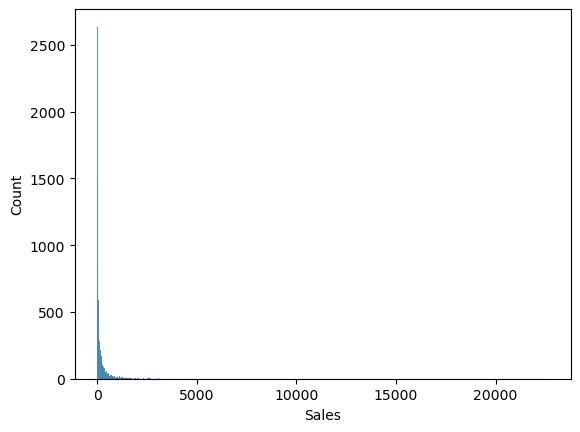

In [35]:
sns.histplot(data=df, x="Sales")

In [36]:
# count orders over 300 

query = """
SELECT
    count(*)
FROM OrderDetails
WHERE Sales > 300
"""

pd.read_sql(query, con = engine )
#TODO - identify the outliers

,count(*)
0,1904


need to separate in categories to get a proper idea of what's going on

In [37]:
# avg sale per category

query = """
SELECT
    AVG(Sales),
    CategoryName
FROM OrderDetails od
JOIN Products p ON od.ProductID = p.ProductID
JOIN Categories c ON p.CategoryID = c.CategoryID
GROUP BY CategoryName

"""

sales_category = pd.read_sql(query, con = engine )


<Axes: xlabel='CategoryName', ylabel='AVG(Sales)'>

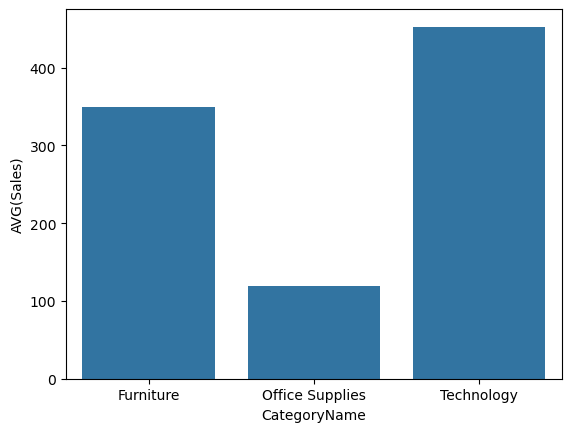

In [38]:
sns.barplot(data=sales_category, x= "CategoryName", y = "AVG(Sales)")

## Distribution of sales

In [39]:
# distribution of sales per category

furniture_query ="""
SELECT CategoryName, Sales
FROM OrderDetails od
JOIN Products p ON od.ProductID = p.ProductID
JOIN Categories c ON p.CategoryID = c.CategoryID
WHERE CategoryName = 'Furniture'

"""
office_supplies_query ="""
SELECT CategoryName, Sales
FROM OrderDetails od
JOIN Products p ON od.ProductID = p.ProductID
JOIN Categories c ON p.CategoryID = c.CategoryID
WHERE CategoryName = 'Office Supplies'

"""
technlogy_query ="""
SELECT CategoryName, Sales
FROM OrderDetails od
JOIN Products p ON od.ProductID = p.ProductID
JOIN Categories c ON p.CategoryID = c.CategoryID
WHERE CategoryName = 'Technology'

"""

furniture_sales = pd.read_sql(furniture_query, con = engine )
office_supplies_sales = pd.read_sql(office_supplies_query, con = engine )
technology_sales= pd.read_sql(technlogy_query, con = engine )


In [40]:
furniture_sales.describe()

,Sales
count,2121.000000
mean,349.834887
std,503.179145
min,1.892000
25%,47.040000
50%,182.220000
75%,435.168000
max,4416.174000


In [41]:
office_supplies_sales.describe()

,Sales
count,6026.000000
mean,119.324101
std,382.182228
min,0.444000
25%,11.760000
50%,27.418000
75%,79.920000
max,9892.740000


In [42]:
technology_sales.describe()

,Sales
count,1847.000000
mean,452.709276
std,1108.655848
min,0.990000
25%,68.016000
50%,166.160000
75%,448.534000
max,22638.480000


<Axes: xlabel='Sales', ylabel='Count'>

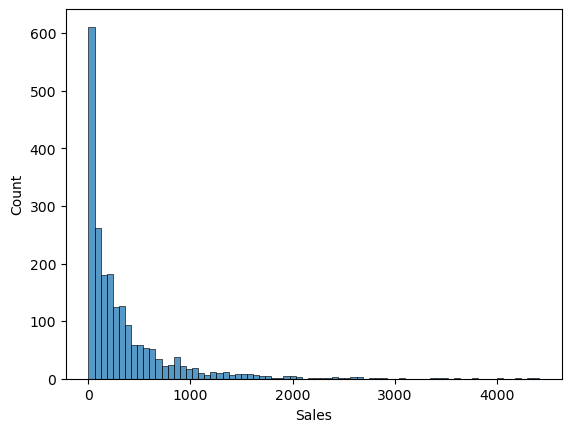

In [43]:
sns.histplot(data=furniture_sales, x="Sales" )

<Axes: xlabel='Sales', ylabel='Count'>

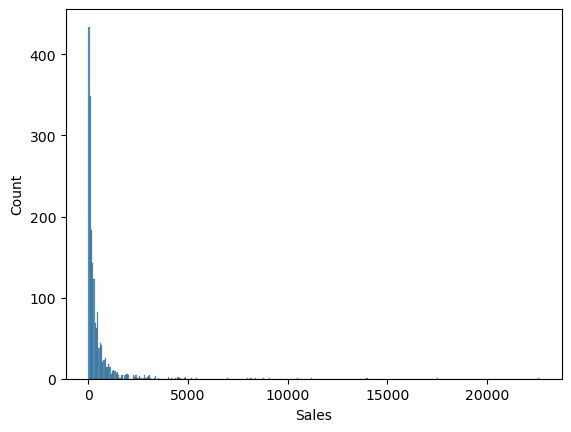

In [44]:
sns.histplot(data=technology_sales, x="Sales" )

(0.0, 2000.0)

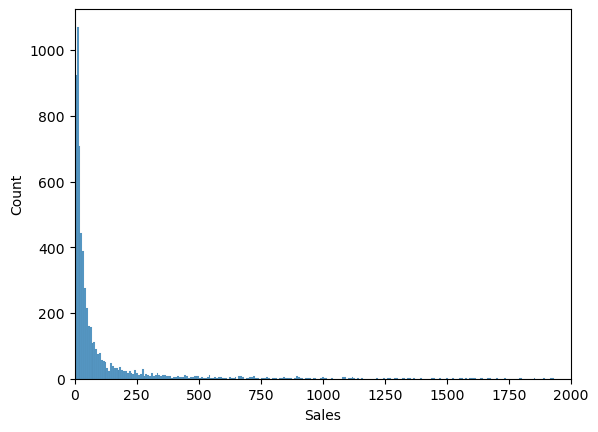

In [45]:
sns.histplot(data=office_supplies_sales, x="Sales" ).set_xlim(0,2000)

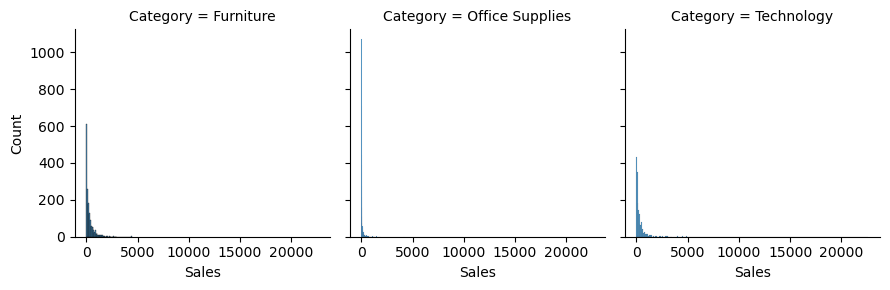

In [46]:
grid = sns.FacetGrid (df, col= "Category")
grid.map(sns.histplot, "Sales")


## Aggregation by state
- Which States and which customers made the highest number of orders? 
- Are they the same as the highest spending States and customers?

In [47]:
# states with highest number of orders

query = """
SELECT
    State,
    count(OrderID) AS Orders
FROM Regions r
JOIN Customers c on r.RegionID = c.RegionID
JOIN Orders o ON c.CustomerID = o.CustomerID
GROUP BY State
ORDER BY Orders DESC
LIMIT 10

"""

pd.read_sql(query, con = engine )

,State,Orders
0,California,1006
1,New York,554
2,Texas,463
3,Pennsylvania,308
4,Illinois,301
5,Ohio,256
6,Washington,227
7,North Carolina,180
8,Florida,142
9,Colorado,136


In [48]:
# states with highest revenue and profit

query = """
    SELECT r.State, 
        SUM (Sales) AS Revenue, 
        SUM(od.Profit) AS Profit,
        SUM (Discount) AS Discount
    FROM Regions r
    JOIN Customers c ON r.RegionID = c.RegionID
    JOIN Orders o ON c.CustomerID = o.CustomerID
    JOIN OrderDetails od ON o.OrderID = od.OrderID
    GROUP BY r.State
    ORDER BY Profit DESC
    LIMIT 10
"""

pd.read_sql(query, con=engine)

,State,Revenue,Profit,Discount
0,California,451036.5823,59398.3125,285.90
1,New York,279549.8235,58177.8341,137.23
2,Washington,133177.2518,24405.7966,62.89
3,Texas,192758.2049,20528.9110,167.69
4,Pennsylvania,142838.5510,13604.9350,117.34
5,Georgia,51400.1450,12781.3426,22.10
6,Arizona,81986.1230,9563.2001,55.40
7,Illinois,112819.7720,9560.1456,109.39
8,Wisconsin,40970.2510,8569.8697,20.35
9,Michigan,58076.8598,7752.2969,29.82


## Aggregation at Customer Level

In [49]:
# customers with highest number of orders

query = """
SELECT
    CustomerName,
    count(OrderID) AS Orders
FROM Customers c 
JOIN Orders o ON c.CustomerID = o.CustomerID
GROUP BY CustomerName
ORDER BY Orders DESC
LIMIT 10

"""

pd.read_sql(query, con = engine )

,CustomerName,Orders
0,Emily Phan,17
1,Zuschuss Carroll,13
2,Sally Hughsby,13
3,Patrick Gardner,13
4,Noel Staavos,13
5,Joel Eaton,13
6,Erin Ashbrook,13
7,Chloris Kastensmidt,13
8,Suzanne McNair,12
9,Sanjit Jacobs,12


In [50]:
# customers that generated most revenue

query = """
SELECT
    CustomerName,
    Segment,
    SUM(Sales) AS Revenue
FROM Customers c 
JOIN Orders o ON c.CustomerID = o.CustomerID
JOIN OrderDetails od ON o.OrderID = od.OrderID
GROUP BY CustomerName, Segment
ORDER BY Revenue DESC
LIMIT 10

"""

pd.read_sql(query, con = engine )


,CustomerName,Segment,Revenue
0,Sean Miller,Home Office,25043.050
1,Tamara Chand,Corporate,19052.218
2,Raymond Buch,Consumer,15117.339
3,Tom Ashbrook,Home Office,14595.620
4,Adrian Barton,Consumer,14473.571
5,Ken Lonsdale,Consumer,14175.229
6,Sanjit Chand,Consumer,14142.334
7,Hunter Lopez,Consumer,12873.298
8,Sanjit Engle,Consumer,12209.438
9,Christopher Conant,Consumer,12129.072


In [51]:
# customers that generated most profit

query = """
SELECT
    CustomerName,
    Segment, 
    SUM(Profit) AS Profit
FROM Customers c 
JOIN Orders o ON c.CustomerID = o.CustomerID
JOIN OrderDetails od ON o.OrderID = od.OrderID
GROUP BY CustomerName, Segment
ORDER BY Profit DESC
LIMIT 10

"""

pd.read_sql(query, con = engine )

,CustomerName,Segment,Profit
0,Tamara Chand,Corporate,8981.3239
1,Raymond Buch,Consumer,6976.0959
2,Sanjit Chand,Consumer,5757.4119
3,Hunter Lopez,Consumer,5622.4292
4,Adrian Barton,Consumer,5444.8055
5,Tom Ashbrook,Home Office,4703.7883
6,Christopher Martinez,Consumer,3899.8904
7,Keith Dawkins,Corporate,3038.6254
8,Andy Reiter,Consumer,2884.6208
9,Daniel Raglin,Home Office,2869.0760


the highest spending customer (Sean Miller) doesn't show up in the top 10 profit. Why? 

In [52]:
query = """
SELECT
    CustomerName,
    SUM(Sales) AS Revenue,
    SUM(Profit) AS Profit,
    SUM(Discount) AS Discount
FROM Customers c 
JOIN Orders o ON c.CustomerID = o.CustomerID
JOIN OrderDetails od ON o.OrderID = od.OrderID
GROUP BY CustomerName
ORDER BY Revenue DESC
LIMIT 10

"""

pd.read_sql(query, con = engine )

,CustomerName,Revenue,Profit,Discount
0,Sean Miller,25043.050,-1980.7393,3.7
1,Tamara Chand,19052.218,8981.3239,1.4
2,Raymond Buch,15117.339,6976.0959,1.7
3,Tom Ashbrook,14595.620,4703.7883,0.8
4,Adrian Barton,14473.571,5444.8055,4.8
5,Ken Lonsdale,14175.229,806.8550,5.8
6,Sanjit Chand,14142.334,5757.4119,1.4
7,Hunter Lopez,12873.298,5622.4292,0.2
8,Sanjit Engle,12209.438,2650.6769,2.1
9,Christopher Conant,12129.072,2177.0493,3.1


In [53]:
# top customers by number of orders

query = """
SELECT
    CustomerName,
    COUNT (o.OrderID) AS OrderCount,
    SUM(Sales) AS Revenue,
    SUM(Profit) AS Profit,
    SUM(Discount) AS Discount,
    (SUM(od.Profit) / SUM(od.Sales)) * 100 AS ProfitMargin
FROM Customers c 
JOIN Orders o ON c.CustomerID = o.CustomerID
JOIN OrderDetails od ON o.OrderID = od.OrderID
GROUP BY CustomerName
ORDER BY OrderCount DESC
LIMIT 20

"""

pd.read_sql(query, con = engine )

,CustomerName,OrderCount,Revenue,Profit,Discount,ProfitMargin
0,William Brown,37,6160.1020,714.3311,7.60,11.596092
1,Paul Prost,34,7252.6080,1495.0854,3.70,20.614452
2,Matt Abelman,34,4299.1610,1240.2266,3.20,28.848108
3,John Lee,34,9799.9230,228.9070,3.00,2.335804
4,Seth Vernon,32,11470.9500,1199.4242,5.00,10.456189
5,Jonathan Doherty,32,7610.8640,1050.2668,2.40,13.799574
6,Edward Hooks,32,10310.8800,1393.5154,2.30,13.515000
7,Chloris Kastensmidt,32,3154.8550,141.2831,7.50,4.478276
8,Zuschuss Carroll,31,8025.7070,-1032.1490,7.90,-12.860537
9,Emily Phan,31,5478.0608,144.9578,6.12,2.646152


## High value orders per segment

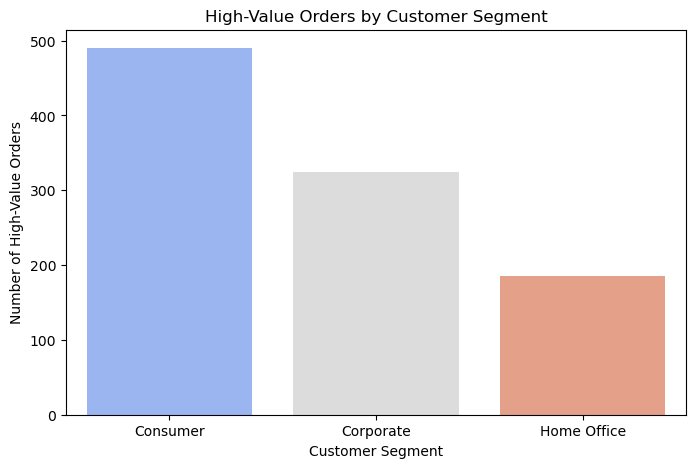

In [54]:
# Identifying high-ticket items: Define a high-value threshold (top 10% of sales)
high_value_threshold = df["Sales"].quantile(0.90)  # Top 10% of sales transactions

# Filter high-value transactions
high_value_sales = df[df["Sales"] >= high_value_threshold]

# Analyze high-value sales by customer segment
high_value_segment_analysis = high_value_sales.groupby("Segment")["Sales"].count().reset_index()
high_value_segment_analysis.columns = ["Segment", "High-Value Order Count"]

# Visualizing high-value sales by customer segment
plt.figure(figsize=(8, 5))
sns.barplot(x="Segment", y="High-Value Order Count", data=high_value_segment_analysis, palette="coolwarm", hue="Segment", legend= False)
plt.title("High-Value Orders by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Number of High-Value Orders")
plt.show()





In [55]:
#customers with multiple addresses
query = """SELECT CustomerID, COUNT(DISTINCT RegionID) AS RegionCount
FROM Customers
GROUP BY CustomerID
HAVING COUNT(DISTINCT RegionID) > 1;"""

pd.read_sql(query, con = engine )

,CustomerID,RegionCount


In [56]:
# addresses with multiple customers
query = """ SELECT RegionID, COUNT(DISTINCT CustomerID) AS CustomerCount
FROM Customers
GROUP BY RegionID
HAVING COUNT(DISTINCT CustomerID) > 1;"""

pd.read_sql(query, con = engine )

,RegionID,CustomerCount
0,1,3
1,2,14
2,4,5
3,6,8
4,7,2
...,...,...
130,353,2
131,359,2
132,362,2
133,365,2


# Research on furniture

Despite having the highest median revenue per sale, it's generating the lowest profit margin.
which suggests that despite selling expensive items, it's not generating enough profit
To investigate this issue, we need to examine the following key factors:

1) Profitability Breakdown Within Furniture
- Which furniture sub-categories are driving the low margins?
- Are some furniture products loss-making while others are profitable?

2) Impact of Discounts on Furniture Profitability
- Are furniture products being heavily discounted?
- Do higher discounts correlate with lower margins?

3) Cost vs. Selling Price Analysis
- Is the cost of furniture too high relative to its sales price?
- Are certain furniture products priced incorrectly?

4) Regional Impact on Furniture Profitability
- Are certain states selling furniture at a loss?
- Are logistics, shipping, or operational costs affecting profitability?



In [57]:
# Add a profit margin column for analysis
df["Profit Margin (%)"] = (df["Profit"] / df["Sales"]) * 100

# 1) Profitability Breakdown Within Furniture
furniture_df = df[df["Category"] == "Furniture"]

# Aggregate profit margin by sub-category
furniture_subcategory_profit = furniture_df.groupby("Sub-Category").agg(
    {"Sales": "sum", "Profit": "sum", "Discount": "mean"}
).reset_index()

# Calculate profit margin percentage
furniture_subcategory_profit["Profit Margin (%)"] = (furniture_subcategory_profit["Profit"] / furniture_subcategory_profit["Sales"]) * 100


furniture_subcategory_profit

,Sub-Category,Sales,Profit,Discount,Profit Margin (%)
0,Bookcases,114879.9963,-3472.5560,0.211140,-3.022768
1,Chairs,328449.1030,26590.1663,0.170178,8.095673
2,Furnishings,91705.1640,13059.1436,0.138349,14.240358
3,Tables,206965.5320,-17725.4811,0.261285,-8.564460


#NOTE - Need to distinguish between profit margin of the whole transaction : sold product to a customer in a given state with a given discount / profit margin for the product : have to calculate cost per unit and exclude the discount. The discounts are not given to a product permanently, it depends on the transaction

In [58]:
# 2) Impact of Discounts on Furniture Profitability (Correlation Analysis)
furniture_discount_correlation = furniture_df[["Profit Margin (%)", "Discount"]].corr().iloc[0, 1]

# Display correlation value for discount impact on furniture profit margin
furniture_discount_correlation

np.float64(-0.8877424977155443)

In [143]:
# correlation in all data set
discount_profit_correlation = df[["Profit Margin (%)", "Discount"]].corr().iloc[0, 1]
discount_profit_correlation


np.float64(-0.8644522856000414)

In [59]:
# 3) Regional Impact on Furniture Profitability (State-wise analysis)
furniture_state_profit = furniture_df.groupby("State").agg(
    {"Sales": "sum", "Profit": "sum", "Discount": "mean"}
).reset_index()

# Filter states with negative furniture profitability
furniture_loss_states = furniture_state_profit[furniture_state_profit["Profit"] < 0]

furniture_loss_states

,State,Sales,Profit,Discount
1,Arizona,13525.2910,-2744.9228,0.285714
4,Colorado,13243.0370,-2683.1342,0.311765
8,Florida,22987.0380,-2254.9807,0.232353
11,Illinois,28274.5220,-9076.2894,0.468293
31,North Carolina,15155.4840,-3486.4633,0.238095
32,Ohio,24199.1450,-4206.3212,0.284946
34,Oregon,6338.1300,-1487.5769,0.342857
35,Pennsylvania,39354.9310,-7196.7199,0.276800
39,Tennessee,13506.7320,-2208.6291,0.235556
40,Texas,60593.2918,-10436.1419,0.422970


## Furniture Description

In [60]:
furniture_df.groupby("Sub-Category").agg(
    total_sales = ("Sales","sum"),
    avg_sales = ("Sales", "mean"),
    total_profit = ("Profit","sum"),
    avg_profit = ("Profit","mean"), 
    count = ("Product Name" ,"count"),
    discount = ("Discount", "mean")
    ).reset_index()

,Sub-Category,total_sales,avg_sales,total_profit,avg_profit,count,discount
0,Bookcases,114879.9963,503.859633,-3472.5560,-15.230509,228,0.211140
1,Chairs,328449.1030,532.332420,26590.1663,43.095894,617,0.170178
2,Furnishings,91705.1640,95.825668,13059.1436,13.645918,957,0.138349
3,Tables,206965.5320,648.794771,-17725.4811,-55.565771,319,0.261285


<Axes: xlabel='Profit Margin (%)', ylabel='Discount'>

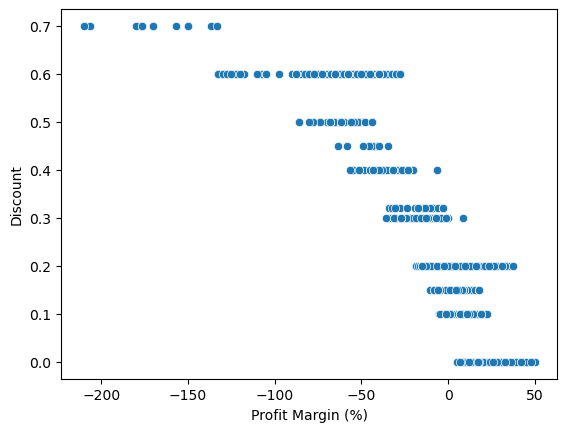

In [61]:
sns.scatterplot(data=furniture_df, x="Profit Margin (%)", y ="Discount")

In [62]:
furniture_loss_states

,State,Sales,Profit,Discount
1,Arizona,13525.2910,-2744.9228,0.285714
4,Colorado,13243.0370,-2683.1342,0.311765
8,Florida,22987.0380,-2254.9807,0.232353
11,Illinois,28274.5220,-9076.2894,0.468293
31,North Carolina,15155.4840,-3486.4633,0.238095
32,Ohio,24199.1450,-4206.3212,0.284946
34,Oregon,6338.1300,-1487.5769,0.342857
35,Pennsylvania,39354.9310,-7196.7199,0.276800
39,Tennessee,13506.7320,-2208.6291,0.235556
40,Texas,60593.2918,-10436.1419,0.422970


In [63]:
# Calculate total amount of discount given
furniture_subcategory_profit["Total Discount Amount"] = furniture_subcategory_profit["Sales"] * furniture_subcategory_profit["Discount"]

# Recalculate absolute discount amount for states with furniture losses
furniture_loss_states["Total Discount Amount"] = furniture_loss_states["Sales"] * furniture_loss_states["Discount"]

/var/folders/kj/_mqw0wd165b_qz356cmtmkzc0000gn/T/ipykernel_1652/314503413.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture_loss_states["Total Discount Amount"] = furniture_loss_states["Sales"] * furniture_loss_states["Discount"]


In [64]:
furniture_subcategory_profit

,Sub-Category,Sales,Profit,Discount,Profit Margin (%),Total Discount Amount
0,Bookcases,114879.9963,-3472.5560,0.211140,-3.022768,24255.802728
1,Chairs,328449.1030,26590.1663,0.170178,8.095673,55894.904076
2,Furnishings,91705.1640,13059.1436,0.138349,14.240358,12687.318405
3,Tables,206965.5320,-17725.4811,0.261285,-8.564460,54077.044176


## Loss Making furniture Products

In [65]:
# 1) Identifying Specific Loss-Making Furniture Products

# Aggregate profitability data at the product level for Furniture
furniture_product_aggregated = furniture_df.groupby("Product Name").agg(
    {"Sales": "sum", "Profit": "sum", "Discount": "mean", "Quantity": "sum"}
).reset_index()

# Filter out products that have negative total profit
loss_making_furniture_products = furniture_product_aggregated[furniture_product_aggregated["Profit"] < 0]

# Calculating avg price per unit 
loss_making_furniture_products["Avg Price Per Unit"] = loss_making_furniture_products["Sales"] / loss_making_furniture_products["Quantity"]

loss_making_furniture_products

/var/folders/kj/_mqw0wd165b_qz356cmtmkzc0000gn/T/ipykernel_1652/4194615661.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_making_furniture_products["Avg Price Per Unit"] = loss_making_furniture_products["Sales"] / loss_making_furniture_products["Quantity"]


,Product Name,Sales,Profit,Discount,Quantity,Avg Price Per Unit
2,36X48 HARDFLOOR CHAIRMAT,369.2480,-40.4914,0.233333,21,17.583238
13,Anderson Hickey Conga Table Tops & Accessories,51.7820,-17.5145,0.300000,5,10.356400
15,"Atlantic Metals Mobile 2-Shelf Bookcases, Cust...",400.0268,-113.2606,0.510000,3,133.342267
17,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",5184.0810,-126.4410,0.266667,27,192.003000
19,BPI Conference Tables,2241.8675,-795.9725,0.370000,26,86.225673
...,...,...,...,...,...,...
359,Tenex Antistatic Computer Chair Mats,3317.0120,-530.0380,0.233333,25,132.680480
361,"Tenex Carpeted, Granite-Look or Clear Contempo...",763.6680,-222.7365,0.240000,15,50.911200
362,"Tenex Chairmat w/ Average Lip, 45"" x 53""",2058.4960,-529.7600,0.300000,19,108.341895
364,Tenex Chairmats For Use with Hard Floors,467.7120,-129.9200,0.266667,20,23.385600


In [66]:
# 2) Analyzing Shipping Costs' Impact on Furniture Profitability

# Aggregate furniture sales and profit by shipping mode
furniture_shipping_analysis = furniture_df.groupby("Ship Mode").agg(
    {"Sales": "sum", "Profit": "sum", "Discount": "mean","Order ID":"count"}
).reset_index()

# Calculate Profit Margin per Shipping Mode
furniture_shipping_analysis["Profit Margin (%)"] = (furniture_shipping_analysis["Profit"] / furniture_shipping_analysis["Sales"]) * 100

furniture_shipping_analysis.sort_values(by = "Profit Margin (%)" )


,Ship Mode,Sales,Profit,Discount,Order ID,Profit Margin (%)
1,Same Day,39148.7790,797.3484,0.186134,119,2.036713
3,Standard Class,435831.4690,10360.7156,0.171651,1248,2.377230
2,Second Class,156289.0244,4226.2614,0.172482,427,2.704132
0,First Class,110730.5229,3066.9474,0.180031,327,2.769740


First and Second class shipments have the highest profit margin. The costs of Same Day shipping seems to be dragging the profit margin down

In [67]:
# 3) Evaluating Customer Segments Buying Discounted Furniture

# Aggregate furniture sales and discount levels by customer segment
furniture_segment_analysis = furniture_df.groupby("Segment").agg(
    {"Sales": "sum", "Profit": "sum", "Discount": "mean"}
).reset_index()

# Calculate Profit Margin per Segment
furniture_segment_analysis["Profit Margin (%)"] = (furniture_segment_analysis["Profit"] / furniture_segment_analysis["Sales"]) * 100
furniture_segment_analysis

,Segment,Sales,Profit,Discount,Profit Margin (%)
0,Consumer,391049.3120,6991.0786,0.176739,1.787774
1,Corporate,229019.7858,7584.8158,0.174071,3.311860
2,Home Office,121930.6975,3875.3784,0.165000,3.178345


Despite Consumer Segment having the highest sales, Corporate and Home Office segment generate the highest profit margin (almost double than Consumer)

In [68]:
loss_making_furniture_products["Discount"].describe()

count    123.000000
mean       0.257774
std        0.092019
min        0.110000
25%        0.200000
50%        0.245000
75%        0.300000
max        0.700000
Name: Discount, dtype: float64

Discount for loss making product for the furniture category is on avg %25, with a maximum of %70 in some cases.

## Customer Loyalty

In [69]:
# Calculate the 75th percentile of discounts in the dataset (for all categories)
discount_75th_percentile = df["Discount"].quantile(0.75)
discount_75th_percentile

np.float64(0.2)

In [70]:
# Analyzing Customer Loyalty and Discounted Furniture Purchases

# Identify repeat customers who purchase Furniture
furniture_repeat_customers = furniture_df.groupby("Customer ID").agg(
    {"Order ID": "count", "Sales": "sum", "Discount": "mean", "Profit": "sum"}
).reset_index()

# Filtering customers who made multiple purchases but received high discounts (above 0.2, taking into account the 75 percentile)
loyal_discount_customers = furniture_repeat_customers[(furniture_repeat_customers["Order ID"] > 2) & (furniture_repeat_customers["Discount"] > 0.2)]

print("Customers who have placed 3 or more orders on Furniture with an average discount above 20% tend to be unprofitable.")
loyal_discount_customers[loyal_discount_customers["Profit"]<0]



Customers who have placed 3 or more orders on Furniture with an average discount above 20% tend to be unprofitable.


,Customer ID,Order ID,Sales,Discount,Profit
6,AB-10105,3,1280.0050,0.366667,-75.2050
23,AG-10675,3,2956.0476,0.273333,-316.9474
42,AR-10405,3,1754.2080,0.233333,-280.3344
56,AW-10930,3,450.3360,0.300000,-102.0176
72,BF-11020,6,903.0900,0.366667,-96.6498
...,...,...,...,...,...
685,TS-21505,4,880.5580,0.275000,-78.4524
686,TS-21610,4,2085.3840,0.450000,-150.1920
698,VS-21820,3,850.6670,0.366667,-223.7096
699,VT-21700,3,907.1700,0.300000,-277.4920


Loyal customers who buy only when discounts are high are eroding profitability. Of the 130 customers with 3 or more orders and discount over 0.2, 100 generated a loss

## Price Comparison: Loss-Making vs. Profitable Furniture


In [71]:
# Filter profitable furniture products
profitable_furniture_products = furniture_product_aggregated[furniture_product_aggregated["Profit"] > 0]

# Calculate Average Price Per Unit for profitable products
profitable_furniture_products["Avg Price Per Unit"] = profitable_furniture_products["Sales"] / profitable_furniture_products["Quantity"]

# Compare average price per unit between loss-making and profitable furniture products
price_comparison = pd.DataFrame({
    "Category": ["Loss-Making Furniture", "Profitable Furniture"],
    "Average Price Per Unit": [
        loss_making_furniture_products["Avg Price Per Unit"].mean(),
        profitable_furniture_products["Avg Price Per Unit"].mean()
    ]
})

/var/folders/kj/_mqw0wd165b_qz356cmtmkzc0000gn/T/ipykernel_1652/76782214.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_furniture_products["Avg Price Per Unit"] = profitable_furniture_products["Sales"] / profitable_furniture_products["Quantity"]


In [72]:
price_comparison

,Category,Average Price Per Unit
0,Loss-Making Furniture,115.300613
1,Profitable Furniture,73.450109


This confirms that loss-making furniture items tend to have higher per-unit prices. This finding suggests that:

Expensive furniture items are being sold at a loss—possibly due to excessive discounts, high shipping/handling costs, or pricing misalignment.
Customers may not be willing to pay full price for these items, forcing the business to apply deep discounts that eliminate profit.
Profitable furniture products tend to be lower in price per unit but generate steady margins, making them more sustainable.

## Discount projection
Analyzing Whether Reducing Discounts Would Retain Customers


In [73]:

# Filtering customers who received high discounts (>= 20%) and checking if they would still be profitable at lower discounts
discount_sensitivity_analysis = furniture_repeat_customers.copy()
discount_sensitivity_analysis = discount_sensitivity_analysis[discount_sensitivity_analysis["Profit"]<0]
discount_sensitivity_analysis["Projected Profit (10% Discount)"] = discount_sensitivity_analysis["Sales"] * (1 - 0.10) - discount_sensitivity_analysis["Sales"] * discount_sensitivity_analysis["Discount"]
discount_sensitivity_analysis["Projected Profit (15% Discount)"] = discount_sensitivity_analysis["Sales"] * (1 - 0.15) - discount_sensitivity_analysis["Sales"] * discount_sensitivity_analysis["Discount"]

discount_sensitivity_analysis

,Customer ID,Order ID,Sales,Discount,Profit,Projected Profit (10% Discount),Projected Profit (15% Discount)
6,AB-10105,3,1280.005,0.366667,-75.2050,682.669333,618.669083
7,AB-10150,1,15.992,0.600000,-13.9930,4.797600,3.998000
10,AB-10600,2,916.224,0.200000,-145.0416,641.356800,595.545600
11,AC-10420,1,698.352,0.200000,-17.4588,488.846400,453.928800
13,AC-10660,1,183.372,0.300000,-7.8588,110.023200,100.854600
...,...,...,...,...,...,...,...
695,VF-21715,2,649.956,0.150000,-167.2068,487.467000,454.969200
697,VP-21760,5,2313.504,0.180000,-1034.1219,1665.722880,1550.047680
698,VS-21820,3,850.667,0.366667,-223.7096,453.689067,411.155717
699,VT-21700,3,907.170,0.300000,-277.4920,544.302000,498.943500


If customers who currently receive 20%+ discounts were given lower discounts (e.g., 10% or 15%), their purchases could become profitable.
However, we need to determine if they would still buy at lower discounts or if they are strictly price-sensitive.

## Loss Making Furniture Subcategories by State

In [74]:
# Aggregate profit per sub-category and state within the Furniture category
furniture_state_subcategory_analysis = furniture_df.groupby(["State", "Sub-Category"]).agg(
    {"Sales": "sum", "Profit": "sum", "Discount": "mean"}
).reset_index()

# Identify sub-categories with losses in each state
loss_making_furniture_state_subcategories = furniture_state_subcategory_analysis[furniture_state_subcategory_analysis["Profit"] < 0]
loss_making_furniture_state_subcategories.head()

,State,Sub-Category,Sales,Profit,Discount
3,Arizona,Bookcases,519.213,-869.2073,0.7
6,Arizona,Tables,3995.350,-2281.8701,0.5
14,California,Tables,45430.232,-303.5580,0.2
15,Colorado,Bookcases,1583.523,-2408.9163,0.7
18,Colorado,Tables,1457.130,-974.8754,0.5


## Count of products driving losses in furniture subcat

In [75]:
#Checking if All Products in Loss-Making Sub-Categories Are Negative or If a Few Are Driving Losses

# Filter only the loss-making furniture sub-categories
loss_making_subcategories = loss_making_furniture_state_subcategories["Sub-Category"].unique()

# Filter furniture products that belong to these sub-categories
loss_making_products_analysis = furniture_df[furniture_df["Sub-Category"].isin(loss_making_subcategories)]

# Aggregate sales and profit at the product level
product_profitability = loss_making_products_analysis.groupby(["Sub-Category", "Product Name"]).agg(
    {"Sales": "sum", "Profit": "sum", "Discount": "mean", "Quantity": "sum"}
).reset_index()

# Identify how many products within each sub-category are profitable vs. unprofitable
product_profitability["Status"] = product_profitability["Profit"].apply(lambda x: "Loss-Making" if x < 0 else "Profitable")

# Count number of loss-making vs. profitable products per sub-category
subcategory_loss_distribution = product_profitability.groupby(["Sub-Category", "Status"])["Product Name"].count().reset_index()

# Pivoting to see distribution clearly
subcategory_loss_pivot = subcategory_loss_distribution.pivot(index="Sub-Category", columns="Status", values="Product Name").fillna(0)
subcategory_loss_pivot = subcategory_loss_pivot.rename(columns={"Loss-Making": "Loss-Making Products", "Profitable": "Profitable Products"})

subcategory_loss_pivot

Status,Loss-Making Products,Profitable Products
Sub-Category,,
Bookcases,33,17
Chairs,24,64
Furnishings,24,162
Tables,42,14


In [76]:
# Calculate average discount for loss-making and profitable products per sub-category
subcategory_discount_analysis = product_profitability.groupby(["Sub-Category", "Status"])["Discount"].mean().reset_index()

# Pivot to align with the previous subcategory loss pivot table
subcategory_discount_pivot = subcategory_discount_analysis.pivot(index="Sub-Category", columns="Status", values="Discount").fillna(0)
subcategory_discount_pivot = subcategory_discount_pivot.rename(columns={"Loss-Making": "Avg Discount (Loss-Making)", "Profitable": "Avg Discount (Profitable)"})

# Merge with the previous subcategory loss pivot table
subcategory_loss_pivot_with_discount = subcategory_loss_pivot.merge(subcategory_discount_pivot, on="Sub-Category", how="left")

In [144]:
subcategory_loss_pivot_with_discount

Status,Loss-Making Products,Profitable Products,Avg Discount (Loss-Making),Avg Discount (Profitable)
Sub-Category,,,,
Bookcases,33,17,0.254118,0.139951
Chairs,24,64,0.192462,0.159871
Furnishings,24,162,0.280443,0.117126
Tables,42,14,0.285015,0.203690


Findings: Subcategory Profitability with Average Discounts
- Bookcases:

Loss-Making Products: 33 items, Average Discount: 25.4%
Profitable Products: 17 items, Average Discount: 13.99%
Loss-making bookcases have nearly double the discount of profitable ones, indicating that discounting is a major factor in losses.
- Tables:

Loss-Making Products: 42 items, Average Discount: 28.5%
Profitable Products: 14 items, Average Discount: 20.4%
Loss-making tables also have significantly higher discounts, but the gap is smaller than for bookcases.
Key Takeaways
Discounting is a major driver of losses—loss-making products in both categories receive much higher average discounts than profitable ones.
Reducing discounts on loss-making bookcases and tables could recover significant profitability.
Profitable products still receive discounts, but at a much more controlled rate, suggesting that discount moderation is key.


## Worst performing products by sub category

In [78]:
# Sort by lowest profit and get the worst 5 products per sub-category
worst_performing_products = product_profitability[product_profitability["Status"] == "Loss-Making"].groupby("Sub-Category").apply(lambda x: x.nsmallest(5, "Profit")).reset_index(drop=True)
worst_performing_products.head()


/var/folders/kj/_mqw0wd165b_qz356cmtmkzc0000gn/T/ipykernel_1652/1183163923.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  worst_performing_products = product_profitability[product_profitability["Status"] == "Loss-Making"].groupby("Sub-Category").apply(lambda x: x.nsmallest(5, "Profit")).reset_index(drop=True)


,Sub-Category,Product Name,Sales,Profit,Discount,Quantity,Status
0,Bookcases,O'Sullivan 4-Shelf Bookcase in Odessa Pine,2740.1970,-975.0988,0.421429,37,Loss-Making
1,Bookcases,O'Sullivan Plantations 2-Door Library in Landv...,2946.3668,-767.7436,0.332000,22,Loss-Making
2,Bookcases,O'Sullivan Living Dimensions 5-Shelf Bookcases,3420.7704,-755.7516,0.240000,21,Loss-Making
3,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",15610.9656,-669.5448,0.234000,24,Loss-Making
4,Bookcases,Bestar Classic Bookcase,1897.8102,-612.9387,0.315000,31,Loss-Making


## Pricing comparison of Profitable vs Loss Making products in same Sub-Category

In [79]:
# Calculate average price per unit for loss-making and profitable products
product_profitability["Avg Price Per Unit"] = product_profitability["Sales"] / product_profitability["Quantity"]

product_profitability["Avg cost Per Unit"] = (product_profitability["Sales"] - (product_profitability["Profit"] 
                                                                               + (product_profitability["Sales"]*product_profitability["Discount"]))
)/product_profitability["Quantity"]

profitability_unit = (product_profitability["Profit"]  + (product_profitability["Sales"]*product_profitability["Discount"]))/product_profitability["Quantity"]

product_profitability["Avg Profit Margin"] = (profitability_unit/product_profitability["Avg Price Per Unit"] ) *100


# Compute the average pricing for profitable vs. loss-making products per sub-category
pricing_comparison = product_profitability.groupby(["Sub-Category", "Status"]).agg({"Avg Price Per Unit":"mean", "Avg cost Per Unit":"mean", "Avg Profit Margin":"mean", "Discount":"mean"})



In [80]:
pricing_comparison

Avg Price Per Unit  Avg cost Per Unit  \
Sub-Category Status                                               
Bookcases    Loss-Making          112.057653          99.550943   
             Profitable           156.271532         122.626059   
Chairs       Loss-Making           97.809492          89.086531   
             Profitable           155.679761         111.705829   
Furnishings  Loss-Making           41.204080          38.041098   
             Profitable            24.516048          16.602166   
Tables       Loss-Making          170.184455         149.432789   
             Profitable           163.211237         115.871623   

                          Avg Profit Margin  Discount  
Sub-Category Status                                    
Bookcases    Loss-Making           6.158924  0.254118  
             Profitable           23.907893  0.139951  
Chairs       Loss-Making           9.126697  0.192462  
             Profitable           27.976110  0.159871  
Furnishings  Loss-Making          11.582880  0.280443  
             Profitable           36.665219  0.117126  
Tables       Loss-Making          11.430682  0.285015  
             Profitable           28.664763  0.203690

Loss making products are associated with higher discounts in every subcategory. 
The avg price per unit is higher in profitable bookcases and chairs than the loss making in the same subcategories. Opposite relation in Furnishings and Tables. 
Profit margin is around 3x bigger in profitable transactions, which could be related to incorrect pricing and higher costs.

Profit margin is not including discount. That's why there's positive profit margin and still loss making


#  (same) Worst-Performing Products Comparison by State


In [81]:

# Extract the worst-performing products from each sub-category
worst_products = product_profitability[product_profitability["Status"] == "Loss-Making"]["Product Name"].unique()

# Filter the dataset to include only these worst-performing products
worst_products_state_analysis = furniture_df[furniture_df["Product Name"].isin(worst_products)]

# Aggregate profit per product and state
worst_products_state_profitability = worst_products_state_analysis.groupby(["Product Name", "State"]).agg(
    {"Sales": "sum", "Profit": "sum", "Discount": "mean", "Quantity": "sum"}
).reset_index()

worst_products_state_profitability

,Product Name,State,Sales,Profit,Discount,Quantity
0,36X48 HARDFLOOR CHAIRMAT,California,167.840,11.7488,0.0,8
1,36X48 HARDFLOOR CHAIRMAT,Delaware,83.920,5.8744,0.0,4
2,36X48 HARDFLOOR CHAIRMAT,Idaho,41.960,2.9372,0.0,2
3,36X48 HARDFLOOR CHAIRMAT,Illinois,25.176,-33.3582,0.6,3
4,36X48 HARDFLOOR CHAIRMAT,Pennsylvania,33.568,-5.4548,0.2,2
...,...,...,...,...,...,...
539,Tenex Chairmats For Use with Hard Floors,Ohio,25.984,-3.8976,0.2,1
540,Tenex Chairmats For Use with Hard Floors,Tennessee,77.952,-11.6928,0.2,3
541,Tenex Chairmats For Use with Hard Floors,Texas,64.960,-84.4480,0.6,5
542,"Tenex Traditional Chairmats for Hard Floors, A...",California,128.900,15.4680,0.0,2


In [82]:
# Identify whether each product makes losses in every state or only in some
worst_products_loss_summary = worst_products_state_profitability.groupby("Product Name").agg(
    total_states=("State", "count"),
    loss_states=("Profit", lambda x: (x < 0).sum())
).reset_index()

# Add a column to indicate if the product loses money in all states
worst_products_loss_summary["Loss in All States"] = worst_products_loss_summary["loss_states"] == worst_products_loss_summary["total_states"]
worst_products_loss_summary

,Product Name,total_states,loss_states,Loss in All States
0,36X48 HARDFLOOR CHAIRMAT,6,3,False
1,Anderson Hickey Conga Table Tops & Accessories,2,2,True
2,"Atlantic Metals Mobile 2-Shelf Bookcases, Cust...",2,2,True
3,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",3,1,False
4,BPI Conference Tables,4,3,False
...,...,...,...,...
118,Tenex Antistatic Computer Chair Mats,4,3,False
119,"Tenex Carpeted, Granite-Look or Clear Contempo...",4,1,False
120,"Tenex Chairmat w/ Average Lip, 45"" x 53""",4,2,False
121,Tenex Chairmats For Use with Hard Floors,6,4,False


In [83]:
worst_products_loss_summary["Loss in All States"].value_counts()

Loss in All States
False    99
True     24
Name: count, dtype: int64

Do Worst-Performing Products Make Losses in Every State?

Not all worst-performing products make losses in every state.

Some products lose money in some states but are profitable in others, suggesting that:

State-level pricing or demand fluctuations might be affecting profitability.
Shipping or operational costs may vary across regions, impacting margins.
Certain states apply excessive discounts, while others keep them controlled.
However, a subset of products lose money in every state, meaning they might have inherently poor pricing structures or high costs.

## products that make loss in every state

In [84]:
all_states_product_loss = worst_products_loss_summary[worst_products_loss_summary["Loss in All States"] == True]

#TODO - analize dicount and pricing in this products

## states with most unprofitable transactions

In [85]:
# Identify profitable and unprofitable transactions
profitable_furniture_transactions = furniture_df[furniture_df["Profit"] > 0]
unprofitable_furniture_transactions = furniture_df[furniture_df["Profit"] > 0]

# Aggregate sales and profit at the state and product level
state_product_profitability = furniture_df.groupby(["State", "Product Name"]).agg(
    {"Sales": "sum", "Profit": "sum", "Discount": "mean", "Quantity": "sum"}
).reset_index()

# Identify how many products within each state are profitable vs. unprofitable
state_product_profitability["Status"] = state_product_profitability["Profit"].apply(lambda x: "Loss-Making" if x < 0 else "Profitable")

# Count number of loss-making vs. profitable products per State
state_loss_distribution = state_product_profitability.groupby(["State", "Status"])["Product Name"].count().reset_index()

# Pivoting to see distribution clearly
state_loss_pivot = state_loss_distribution.pivot(index="State", columns="Status", values="Product Name").fillna(0)
state_loss_pivot = state_loss_pivot.rename(columns={"Loss-Making": "Loss-Making Products", "Profitable": "Profitable Products"})

state_loss_pivot

Status,Loss-Making Products,Profitable Products
State,,
Alabama,0.0,11.0
Arizona,20.0,22.0
Arkansas,0.0,9.0
California,46.0,216.0
Colorado,17.0,28.0
Connecticut,2.0,10.0
Delaware,2.0,16.0
District of Columbia,0.0,3.0
Florida,26.0,53.0


## Not so bad products

In [86]:
# Filtering products that make losses in some states and not in others
partially_profitable_products = worst_products_loss_summary[worst_products_loss_summary["Loss in All States"] == False]["Product Name"]

# Filter the state-level profitability data for only these products
partial_loss_products_state_data = worst_products_state_profitability[worst_products_state_profitability["Product Name"].isin(partially_profitable_products)]

partial_loss_products_state_data

,Product Name,State,Sales,Profit,Discount,Quantity
0,36X48 HARDFLOOR CHAIRMAT,California,167.840,11.7488,0.0,8
1,36X48 HARDFLOOR CHAIRMAT,Delaware,83.920,5.8744,0.0,4
2,36X48 HARDFLOOR CHAIRMAT,Idaho,41.960,2.9372,0.0,2
3,36X48 HARDFLOOR CHAIRMAT,Illinois,25.176,-33.3582,0.6,3
4,36X48 HARDFLOOR CHAIRMAT,Pennsylvania,33.568,-5.4548,0.2,2
...,...,...,...,...,...,...
539,Tenex Chairmats For Use with Hard Floors,Ohio,25.984,-3.8976,0.2,1
540,Tenex Chairmats For Use with Hard Floors,Tennessee,77.952,-11.6928,0.2,3
541,Tenex Chairmats For Use with Hard Floors,Texas,64.960,-84.4480,0.6,5
542,"Tenex Traditional Chairmats for Hard Floors, A...",California,128.900,15.4680,0.0,2


## checking loss products at customer level 

In [87]:
furniture_df[furniture_df["Product Name"] == "36X48 HARDFLOOR CHAIRMAT"][["Customer Name","State","Sales","Quantity","Discount", "Profit","Profit Margin (%)"]]

,Customer Name,State,Sales,Quantity,Discount,Profit,Profit Margin (%)
3050,Nick Zandusky,Idaho,41.960,2,0.0,2.9372,7.00
5255,Alan Haines,Pennsylvania,33.568,2,0.2,-5.4548,-16.25
7187,Emily Ducich,Texas,16.784,2,0.6,-22.2388,-132.50
7408,Jason Gross,California,167.840,8,0.0,11.7488,7.00
7604,Brian Stugart,Illinois,25.176,3,0.6,-33.3582,-132.50
8404,Harold Engle,Delaware,83.920,4,0.0,5.8744,7.00


#NOTE - profit margin % of the transaction, not of the product

## analizing if some customers always get discount and give losses

In [88]:
furniture_df[furniture_df["Customer Name"] == "Brian Stugart"][["Product Name","State","Sales","Quantity","Discount", "Profit","Profit Margin (%)"]]

,Product Name,State,Sales,Quantity,Discount,Profit,Profit Margin (%)
5843,DAX Contemporary Wood Frame with Silver Metal ...,California,80.960,4,0.0,29.1456,36.00
5846,Office Star - Contemporary Swivel Chair with P...,California,225.568,2,0.2,2.8196,1.25
5847,Advantus Panel Wall Certificate Holder - 8.5x11,California,36.600,3,0.0,15.3720,42.00
7604,36X48 HARDFLOOR CHAIRMAT,Illinois,25.176,3,0.6,-33.3582,-132.50
7605,G.E. Halogen Desk Lamp Bulbs,Illinois,5.584,2,0.6,-1.6752,-30.00


same person buys from different states. His purchases in California have non or low discount, the ones in Illinois are heavily discounted and generate losses
Conclusion:
Is not a subcategory, a product or a customer that gives losses. It's the discount to certain transactions, which are influenced by the state. (check this)

In [89]:
furniture_df[furniture_df["State"] == "Illinois"][["Product Name","State","Sales","Quantity","Discount", "Profit","Profit Margin (%)"]]

,Product Name,State,Sales,Quantity,Discount,Profit,Profit Margin (%)
66,"Global Value Mid-Back Manager's Chair, Gray",Illinois,213.115,5,0.3,-15.2225,-7.142857
125,Bevis 44 x 96 Conference Tables,Illinois,617.700,6,0.5,-407.6820,-66.000000
238,Luxo Professional Fluorescent Magnifier Lamp w...,Illinois,419.680,5,0.6,-356.7280,-85.000000
239,Staple-based wall hangings,Illinois,11.688,3,0.6,-4.6752,-40.000000
241,KI Conference Tables,Illinois,177.225,5,0.5,-120.5130,-68.000000
...,...,...,...,...,...,...,...
9476,"Tenex Traditional Chairmats for Hard Floors, A...",Illinois,51.560,2,0.6,-61.8720,-120.000000
9536,"Eldon Expressions Wood Desk Accessories, Oak",Illinois,8.856,3,0.6,-6.8634,-77.500000
9747,DAX Wood Document Frame.,Illinois,10.984,2,0.6,-7.9634,-72.500000
9748,Global Commerce Series High-Back Swivel/Tilt C...,Illinois,797.944,4,0.3,-56.9960,-7.142857


In [90]:
# Separate discounts for loss-making and profitable states
discount_loss_states = partial_loss_products_state_data[partial_loss_products_state_data["Profit"] < 0]["Discount"].mean()
discount_profitable_states = partial_loss_products_state_data[partial_loss_products_state_data["Profit"] > 0]["Discount"].mean()

# Return the calculated values
discount_loss_states, discount_profitable_states

discount_comparison_df = pd.DataFrame({
    "Category": ["Loss-Making States", "Profitable States"],
    "Average Discount": [discount_loss_states, discount_profitable_states]
})

discount_comparison_df

,Category,Average Discount
0,Loss-Making States,0.355965
1,Profitable States,0.047668


Findings: Average Discount in Loss-Making vs. Profitable States
For partially profitable products (products that lose money in some states but are profitable in others):

Average Discount in Loss-Making States: 35.60%
Average Discount in Profitable States: 0.05%
Key Insights
Huge Discount Gap – The average discount in loss-making states (35.60%) is drastically higher than in profitable states (0.05%).
Discounting is the Primary Issue – This confirms that excessive discounting is the key factor behind losses, rather than product costs or other operational factors.

Profitable States Use Minimal Discounts – Profitable states sell the same products without relying on deep discounts, proving that demand exists at normal prices.

##  Investigating Why Some States Manage to Sell Worst-Performing Products Profitably


In [91]:

# Identify states where at least one of the worst-performing products is profitable
profitable_worst_products = worst_products_state_profitability[worst_products_state_profitability["Profit"] > 0]

# Aggregate the number of profitable occurrences per state
profitable_states_analysis = profitable_worst_products.groupby("State").agg(
    profitable_products=("Product Name", "count"),
    avg_discount=("Discount", "mean")
).reset_index()

profitable_states_analysis


,State,profitable_products,avg_discount
0,Alabama,4,0.000000
1,Arizona,1,0.200000
2,Arkansas,1,0.000000
3,California,38,0.121053
4,Colorado,1,0.200000
5,Delaware,2,0.000000
6,Florida,4,0.200000
7,Georgia,5,0.000000
8,Idaho,3,0.000000
9,Indiana,4,0.000000


## Analyzing Shipping Costs and Their Impact on Losses in Specific States


In [92]:
# Aggregate profit margin by shipping mode per state
state_shipping_analysis = furniture_df.groupby(["State", "Ship Mode"]).agg(
    {"Sales": "sum", "Profit": "sum", "Discount": "mean"}
).reset_index()

# Calculate Profit Margin per Shipping Mode per State
state_shipping_analysis["Profit Margin (%)"] = (state_shipping_analysis["Profit"] / state_shipping_analysis["Sales"]) * 100


state_shipping_analysis.sort_values(by= ["State","Profit Margin (%)"])

,State,Ship Mode,Sales,Profit,Discount,Profit Margin (%)
1,Alabama,Second Class,2375.900,238.2062,0.000000,10.025935
2,Alabama,Standard Class,3947.620,990.4044,0.000000,25.088646
0,Alabama,First Class,8.960,2.7776,0.000000,31.000000
3,Arizona,First Class,2258.862,-1025.0357,0.385714,-45.378412
5,Arizona,Second Class,944.202,-260.2198,0.400000,-27.559759
...,...,...,...,...,...,...
143,Wisconsin,Second Class,3936.260,798.6404,0.000000,20.289320
144,Wisconsin,Standard Class,10424.960,2333.6668,0.000000,22.385379
141,Wisconsin,First Class,2889.570,703.9119,0.000000,24.360438
142,Wisconsin,Same Day,5.820,2.7354,0.000000,47.000000


Do Shipping Costs Contribute to Losses in Certain States?

In some states, shipping costs erode profits, especially for heavier or bulkier furniture items.
Certain shipping modes (e.g., Standard Class) contribute to lower profit margins, indicating high transportation costs.
Some states with high shipping costs struggle to sell at a profit, while others with lower shipping expenses manage to remain profitable.

## Simulating Potential Profit Recovery if Discounts Were Adjusted State-by-State


In [93]:
# Assume a scenario where discounts are reduced by 50% on worst-performing products in loss-making states
worst_products_state_profitability["Adjusted Discount"] = worst_products_state_profitability["Discount"] * 0.5

# Recalculate projected profit assuming all other costs remain the same
worst_products_state_profitability["Projected Profit"] = worst_products_state_profitability["Sales"] * (1 - worst_products_state_profitability["Adjusted Discount"])
worst_products_state_profitability


,Product Name,State,Sales,Profit,Discount,Quantity,Adjusted Discount,Projected Profit
0,36X48 HARDFLOOR CHAIRMAT,California,167.840,11.7488,0.0,8,0.0,167.8400
1,36X48 HARDFLOOR CHAIRMAT,Delaware,83.920,5.8744,0.0,4,0.0,83.9200
2,36X48 HARDFLOOR CHAIRMAT,Idaho,41.960,2.9372,0.0,2,0.0,41.9600
3,36X48 HARDFLOOR CHAIRMAT,Illinois,25.176,-33.3582,0.6,3,0.3,17.6232
4,36X48 HARDFLOOR CHAIRMAT,Pennsylvania,33.568,-5.4548,0.2,2,0.1,30.2112
...,...,...,...,...,...,...,...,...
539,Tenex Chairmats For Use with Hard Floors,Ohio,25.984,-3.8976,0.2,1,0.1,23.3856
540,Tenex Chairmats For Use with Hard Floors,Tennessee,77.952,-11.6928,0.2,3,0.1,70.1568
541,Tenex Chairmats For Use with Hard Floors,Texas,64.960,-84.4480,0.6,5,0.3,45.4720
542,"Tenex Traditional Chairmats for Hard Floors, A...",California,128.900,15.4680,0.0,2,0.0,128.9000


Simulated Profit Recovery with Reduced Discounts

- Reducing discounts by 50% in loss-making states would significantly improve profitability.
- Many loss-making products would turn profitable if discounts were adjusted to match the levels in states that sell them profitably.
- This confirms that discount optimization is a key strategy for improving margins.

Key Takeaways
- Some states keep worst-performing products profitable through better discount control.
- High shipping costs in certain states contribute to losses, making logistics a factor in profitability.
- Reducing discounts selectively (instead of a blanket approach) could recover profits without sacrificing too many sales.


## Identifying States That Apply the Highest Discounts to Loss-Making Products

In [94]:
# Filter only loss-making states for worst-performing products
loss_making_states = partial_loss_products_state_data[partial_loss_products_state_data["Profit"] < 0]

# Aggregate average discount by state
state_discount_analysis = loss_making_states.groupby("State")["Discount"].mean().reset_index()

# Sort states by highest average discount
state_discount_analysis = state_discount_analysis.sort_values(by="Discount", ascending=False)

state_discount_analysis

,State,Discount
2,Colorado,0.550000
6,Illinois,0.464865
14,Oregon,0.442857
0,Arizona,0.440000
18,Texas,0.384615
15,Pennsylvania,0.374074
13,Ohio,0.352000
11,New York,0.335000
12,North Carolina,0.309091
17,Tennessee,0.307692


## Simulating Profit Recovery If Discounts Were Reduced in Loss-Making States

In [95]:
# Assume a scenario where discounts are reduced to 15% in loss-making states
loss_making_states["Adjusted Discount"] = 0.15

# Recalculate estimated cost considering the original discount impact
loss_making_states["Estimated Cost"] = loss_making_states["Sales"] - (loss_making_states["Profit"] + (loss_making_states["Sales"] * loss_making_states["Discount"]))

# Recalculate projected profit using the corrected cost estimation
loss_making_states["Projected Profit"] = (loss_making_states["Sales"] * (1 - loss_making_states["Adjusted Discount"])) - loss_making_states["Estimated Cost"]

loss_making_states

/var/folders/kj/_mqw0wd165b_qz356cmtmkzc0000gn/T/ipykernel_1652/3920025709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_making_states["Adjusted Discount"] = 0.15
/var/folders/kj/_mqw0wd165b_qz356cmtmkzc0000gn/T/ipykernel_1652/3920025709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_making_states["Estimated Cost"] = loss_making_states["Sales"] - (loss_making_states["Profit"] + (loss_making_states["Sales"] * loss_making_states["Discount"]))
/var/folders/kj/_mqw0wd165b_qz356cmtmkzc0000gn

,Product Name,State,Sales,Profit,Discount,Quantity,Adjusted Discount,Estimated Cost,Projected Profit
3,36X48 HARDFLOOR CHAIRMAT,Illinois,25.1760,-33.3582,0.60,3,0.15,43.428600,-22.02900
4,36X48 HARDFLOOR CHAIRMAT,Pennsylvania,33.5680,-5.4548,0.20,2,0.15,32.309200,-3.77640
5,36X48 HARDFLOOR CHAIRMAT,Texas,16.7840,-22.2388,0.60,2,0.15,28.952400,-14.68600
11,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",Colorado,590.0580,-786.7440,0.70,7,0.15,963.761400,-462.21210
13,BPI Conference Tables,Florida,562.2925,-255.5875,0.45,7,0.15,564.848375,-86.89975
...,...,...,...,...,...,...,...,...,...
537,Tenex Chairmats For Use with Hard Floors,Illinois,38.9760,-50.6688,0.60,3,0.15,66.259200,-33.12960
539,Tenex Chairmats For Use with Hard Floors,Ohio,25.9840,-3.8976,0.20,1,0.15,24.684800,-2.59840
540,Tenex Chairmats For Use with Hard Floors,Tennessee,77.9520,-11.6928,0.20,3,0.15,74.054400,-7.79520
541,Tenex Chairmats For Use with Hard Floors,Texas,64.9600,-84.4480,0.60,5,0.15,110.432000,-55.21600


In [96]:
# transactions that would yield positive profit after adjusting discount to 15%
profitable_transactions_after_discount_adjustment = loss_making_states[loss_making_states["Projected Profit"] > 0]
len(profitable_transactions_after_discount_adjustment)

44

In [97]:
# # transactions that would yield positive profit after removing discount
# profitable_transactions_after_removing_discount = loss_making_states[loss_making_states["Profit Without Discount"] > 0]
# len(profitable_transactions_after_removing_discount)

Customer Discount Sensitivity Analysis

If customers who currently receive 20%+ discounts were given lower discounts (e.g., 10% or 15%), their purchases could become profitable.
However, we need to determine if they would still buy at lower discounts or if they are strictly price-sensitive.

## Cost estimation

How to Correctly Estimate Cost:

We can assume that the original cost of a product is the portion of sales that was not affected by the profit and discount.

Estimated Cost=Sales−(Profit+(Sales×Discount))

This formula ensures that:

We remove the effect of discounting from the sales price.
We factor in the original profit, so that cost reflects pre-discount expenses.
We do not overestimate cost due to large discounts.

Then, the Projected Profit (after discount adjustment) should be:

Projected Profit=(Sales×(1−Adjusted Discount))−Estimated Cost




In [98]:

# Estimate cost based on original discount impact
partial_loss_products_state_data["Estimated Cost"] = partial_loss_products_state_data["Sales"] - (
    partial_loss_products_state_data["Profit"] + (partial_loss_products_state_data["Sales"] * partial_loss_products_state_data["Discount"])
)

# Assume a scenario where discounts are reduced to 15% in loss-making states
partial_loss_products_state_data["Adjusted Discount"] = 0.15

# Recalculate projected profit using the corrected cost estimation
partial_loss_products_state_data["Projected Profit"] = (partial_loss_products_state_data["Sales"] * (1 - partial_loss_products_state_data["Adjusted Discount"])) - partial_loss_products_state_data["Estimated Cost"]

# 1) Identifying Products That Remain Unprofitable Even After Discount Reduction

# Filter products that still show a negative projected profit after discount adjustment
still_unprofitable_products = partial_loss_products_state_data[partial_loss_products_state_data["Projected Profit"] < 0]



/var/folders/kj/_mqw0wd165b_qz356cmtmkzc0000gn/T/ipykernel_1652/1890012308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_loss_products_state_data["Estimated Cost"] = partial_loss_products_state_data["Sales"] - (
/var/folders/kj/_mqw0wd165b_qz356cmtmkzc0000gn/T/ipykernel_1652/1890012308.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_loss_products_state_data["Adjusted Discount"] = 0.15
/var/folders/kj/_mqw0wd165b_qz356cmtmkzc0000gn/T/ipykernel_1652/1890012308.py:10: SettingWithCopyW

## Identifying Products That Would Still Lose Money Even Without Discounts

In [99]:
# Calculate the profit assuming no discounts (i.e., full sales price minus estimated cost)
partial_loss_products_state_data["Profit Without Discount"] = (partial_loss_products_state_data["Sales"] - partial_loss_products_state_data["Estimated Cost"])

# Filter products that would still be unprofitable even without discounts
still_unprofitable_without_discount = partial_loss_products_state_data[partial_loss_products_state_data["Profit Without Discount"] < 0]
profitable_without_discount = partial_loss_products_state_data[partial_loss_products_state_data["Profit Without Discount"] > 0]
still_unprofitable_without_discount

/var/folders/kj/_mqw0wd165b_qz356cmtmkzc0000gn/T/ipykernel_1652/1834596957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_loss_products_state_data["Profit Without Discount"] = (partial_loss_products_state_data["Sales"] - partial_loss_products_state_data["Estimated Cost"])


,Product Name,State,Sales,Profit,Discount,Quantity,Estimated Cost,Adjusted Discount,Projected Profit,Profit Without Discount
3,36X48 HARDFLOOR CHAIRMAT,Illinois,25.1760,-33.3582,0.60,3,43.428600,0.15,-22.02900,-18.252600
5,36X48 HARDFLOOR CHAIRMAT,Texas,16.7840,-22.2388,0.60,2,28.952400,0.15,-14.68600,-12.168400
11,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",Colorado,590.0580,-786.7440,0.70,7,963.761400,0.15,-462.21210,-373.703400
13,BPI Conference Tables,Florida,562.2925,-255.5875,0.45,7,564.848375,0.15,-86.89975,-2.555875
14,BPI Conference Tables,Illinois,511.1750,-306.7050,0.50,7,562.292500,0.15,-127.79375,-51.117500
...,...,...,...,...,...,...,...,...,...,...
532,"Tenex Chairmat w/ Average Lip, 45"" x 53""",Illinois,242.1760,-302.7200,0.60,4,399.590400,0.15,-193.74080,-157.414400
534,"Tenex Chairmat w/ Average Lip, 45"" x 53""",Texas,302.7200,-378.4000,0.60,5,499.488000,0.15,-242.17600,-196.768000
537,Tenex Chairmats For Use with Hard Floors,Illinois,38.9760,-50.6688,0.60,3,66.259200,0.15,-33.12960,-27.283200
541,Tenex Chairmats For Use with Hard Floors,Texas,64.9600,-84.4480,0.60,5,110.432000,0.15,-55.21600,-45.472000


In [100]:
# Number of transactions that wold be profitable if discount was removed completely
profitable_without_discount["Product Name"].nunique()

99

In [101]:
# Number of transactions that would still be negative after removing discounts
still_unprofitable_without_discount["Product Name"].nunique()

61

In [102]:
# calculating cost p/unit
still_unprofitable_without_discount["Estimated Cost p/unit"] = still_unprofitable_without_discount["Estimated Cost"] / still_unprofitable_without_discount["Quantity"]

/var/folders/kj/_mqw0wd165b_qz356cmtmkzc0000gn/T/ipykernel_1652/214964052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  still_unprofitable_without_discount["Estimated Cost p/unit"] = still_unprofitable_without_discount["Estimated Cost"] / still_unprofitable_without_discount["Quantity"]


In [103]:
still_unprofitable_without_discount

,Product Name,State,Sales,Profit,Discount,Quantity,Estimated Cost,Adjusted Discount,Projected Profit,Profit Without Discount,Estimated Cost p/unit
3,36X48 HARDFLOOR CHAIRMAT,Illinois,25.1760,-33.3582,0.60,3,43.428600,0.15,-22.02900,-18.252600,14.476200
5,36X48 HARDFLOOR CHAIRMAT,Texas,16.7840,-22.2388,0.60,2,28.952400,0.15,-14.68600,-12.168400,14.476200
11,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",Colorado,590.0580,-786.7440,0.70,7,963.761400,0.15,-462.21210,-373.703400,137.680200
13,BPI Conference Tables,Florida,562.2925,-255.5875,0.45,7,564.848375,0.15,-86.89975,-2.555875,80.692625
14,BPI Conference Tables,Illinois,511.1750,-306.7050,0.50,7,562.292500,0.15,-127.79375,-51.117500,80.327500
...,...,...,...,...,...,...,...,...,...,...,...
532,"Tenex Chairmat w/ Average Lip, 45"" x 53""",Illinois,242.1760,-302.7200,0.60,4,399.590400,0.15,-193.74080,-157.414400,99.897600
534,"Tenex Chairmat w/ Average Lip, 45"" x 53""",Texas,302.7200,-378.4000,0.60,5,499.488000,0.15,-242.17600,-196.768000,99.897600
537,Tenex Chairmats For Use with Hard Floors,Illinois,38.9760,-50.6688,0.60,3,66.259200,0.15,-33.12960,-27.283200,22.086400
541,Tenex Chairmats For Use with Hard Floors,Texas,64.9600,-84.4480,0.60,5,110.432000,0.15,-55.21600,-45.472000,22.086400


In [104]:
still_unprofitable_without_discount.groupby("State").size()

State
Arizona            9
Colorado           6
Florida            3
Illinois          24
New York           2
North Carolina     1
Ohio               8
Oregon             5
Pennsylvania       7
Tennessee          4
Texas             16
dtype: int64

## Analizing tables and boockases

In [105]:
# filtering the df for subcategories generating loss 
tables = furniture_df[furniture_df["Sub-Category"]=="Tables"]
bookcases = furniture_df[furniture_df["Sub-Category"]=="Bookcases"]

In [106]:
# explore the transactions generating negative profit
tables[tables["Profit"]<0].head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin (%)
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.000000
125,126,US-2014-134614,9/20/2014,9/25/2014,Standard Class,PF-19165,Philip Fox,Consumer,United States,Bloomington,...,Central,FUR-TA-10004534,Furniture,Tables,Bevis 44 x 96 Conference Tables,617.7000,6,0.50,-407.6820,-66.000000
201,202,CA-2014-133690,8/3/2014,8/5/2014,First Class,BS-11755,Bruce Stewart,Consumer,United States,Denver,...,West,FUR-TA-10004289,Furniture,Tables,BoxOffice By Design Rectangular and Half-Moon ...,218.7500,2,0.50,-161.8750,-74.000000
231,232,US-2017-100930,4/7/2017,4/12/2017,Standard Class,CS-12400,Christopher Schild,Home Office,United States,Tampa,...,South,FUR-TA-10001705,Furniture,Tables,Bush Advantage Collection Round Conference Table,233.8600,2,0.45,-102.0480,-43.636364
232,233,US-2017-100930,4/7/2017,4/12/2017,Standard Class,CS-12400,Christopher Schild,Home Office,United States,Tampa,...,South,FUR-TA-10003473,Furniture,Tables,Bretford Rectangular Conference Table Tops,620.6145,3,0.45,-248.2458,-40.000000


In [107]:
# Analize relationship between shipping mode and profit
tables.groupby("Ship Mode").agg(
    total_sales = ("Sales","sum"),
    avg_sales = ("Sales", "mean"),
    total_profit = ("Profit","sum"),
    avg_profit = ("Profit","mean"), 
    count = ("Product Name" ,"count"),
    discount = ("Discount", "mean")
)

,total_sales,avg_sales,total_profit,avg_profit,count,discount
Ship Mode,,,,,,
First Class,28800.7760,612.782468,-1365.3665,-29.050351,47,0.240426
Same Day,9644.3470,459.254619,-1129.4225,-53.782024,21,0.261905
Second Class,43693.7475,716.290943,-3320.6799,-54.437375,61,0.248361
Standard Class,124826.6615,656.982429,-11910.0122,-62.684275,190,0.270526


Regardless the shipping mode, the profit is negative

In [108]:
tables.groupby("Segment").agg(
    total_sales = ("Sales","sum"),
    avg_sales = ("Sales", "mean"),
    total_profit = ("Profit","sum"),
    avg_profit = ("Profit","mean"), 
    count = ("Product Name" ,"count"),
    discount = ("Discount", "mean")
)

,total_sales,avg_sales,total_profit,avg_profit,count,discount
Segment,,,,,,
Consumer,99933.7950,628.514434,-9728.0378,-61.182628,159,0.266038
Corporate,70871.7175,668.601108,-4906.4986,-46.287723,106,0.259906
Home Office,36160.0195,669.629991,-3090.9447,-57.239717,54,0.250000


Corporate segment generates less losses, but still negative profit in all segments

In [109]:
# Analizing tables subcategory by state
tables_by_state = tables.groupby("State").agg(
    total_sales = ("Sales","sum"),
    avg_sales = ("Sales", "mean"),
    total_profit = ("Profit","sum"),
    avg_profit = ("Profit","mean"), 
    count = ("Product Name" ,"count"),
    discount = ("Discount", "mean")
)
profitable_table_states = tables_by_state[tables_by_state["total_profit"]>0]
unprofitable_table_states = tables_by_state[tables_by_state["total_profit"]<0]
unprofitable_table_states
print(f"{len(profitable_table_states)} states make profit with the table subcategory.")
print(f"{len(unprofitable_table_states)} states make loss with the table subcategory.")


      

18 states make profit with the table subcategory.
20 states make loss with the table subcategory.


do they make loss with all the products? 

In [110]:
# count per state how many table products are profitable and unprofitable

product_profitability = tables.groupby(["State", "Product Name"]).agg(
    {"Sales": "sum", "Profit": "sum", "Discount": "mean", "Quantity": "sum"}
).reset_index()

# Identify how many products within each state are profitable vs. unprofitable
product_profitability["Status"] = product_profitability["Profit"].apply(lambda x: "Loss-Making" if x < 0 else "Profitable")

# Count number of loss-making vs. profitable products per state
subcategory_loss_distribution = product_profitability.groupby(["State", "Status"])["Product Name"].count().reset_index()

# Pivoting to see distribution clearly
subcategory_loss_pivot = subcategory_loss_distribution.pivot(index="State", columns="Status", values="Product Name").fillna(0)
subcategory_loss_pivot = subcategory_loss_pivot.rename(columns={"Loss-Making": "Loss-Making Table Products", "Profitable": "Profitable Table Products"})

subcategory_loss_pivot

Status,Loss-Making Table Products,Profitable Table Products
State,,
Alabama,0.0,3.0
Arizona,8.0,0.0
Arkansas,0.0,1.0
California,18.0,24.0
Colorado,3.0,0.0
Connecticut,2.0,0.0
Delaware,2.0,0.0
Florida,10.0,0.0
Georgia,0.0,2.0


## tables deep analysis


In [111]:
# 1) Identifying Specific Loss-Making table Products

# Aggregate profitability data at the product level for tables subcat
tables_product_aggregated = tables.groupby("Product Name").agg(
    {"Sales": "sum", "Profit": "sum", "Discount": "mean", "Quantity": "sum"}
).reset_index()

# Filter out products that have negative total profit
loss_making_table_products = tables_product_aggregated[tables_product_aggregated["Profit"] < 0].copy()

# Calculating avg price per unit 
loss_making_table_products["Avg Price Per Unit"] = loss_making_table_products["Sales"] / loss_making_table_products["Quantity"]
loss_making_table_products.head()

,Product Name,Sales,Profit,Discount,Quantity,Avg Price Per Unit
0,Anderson Hickey Conga Table Tops & Accessories,51.7820,-17.5145,0.3000,5,10.356400
1,BPI Conference Tables,2241.8675,-795.9725,0.3700,26,86.225673
2,Balt Solid Wood Rectangular Table,828.0965,-216.2545,0.2625,11,75.281500
3,Balt Solid Wood Round Tables,6518.7540,-1201.0581,0.2000,19,343.092316
4,Balt Split Level Computer Training Table,1040.6250,-357.9750,0.3800,12,86.718750


In [112]:
loss_making_table_products["Discount"].describe()

count    42.000000
mean      0.285015
std       0.071408
min       0.160000
25%       0.238542
50%       0.281667
75%       0.324306
max       0.483333
Name: Discount, dtype: float64

# price restructuring

In [113]:
partial_loss_products_state_data["Estimated Cost p/unit"] = partial_loss_products_state_data["Estimated Cost"] / partial_loss_products_state_data["Quantity"]
partial_loss_products_state_data["Estimated Sale Price p/unit"] = partial_loss_products_state_data["Sales"] / partial_loss_products_state_data["Quantity"]
partial_loss_products_state_data["Estimated profit p/unit"] = partial_loss_products_state_data["Estimated Sale Price p/unit"] - partial_loss_products_state_data["Estimated Cost p/unit"]

partial_loss_products_state_data["Estimated Profit Margin p/unit"] = partial_loss_products_state_data["Estimated profit p/unit"] / partial_loss_products_state_data["Estimated Sale Price p/unit"]

partial_loss_products_state_data

#NOTE - products of furniture category that make profit in some states and loss in others


/var/folders/kj/_mqw0wd165b_qz356cmtmkzc0000gn/T/ipykernel_1652/2093837277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_loss_products_state_data["Estimated Cost p/unit"] = partial_loss_products_state_data["Estimated Cost"] / partial_loss_products_state_data["Quantity"]
/var/folders/kj/_mqw0wd165b_qz356cmtmkzc0000gn/T/ipykernel_1652/2093837277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_loss_products_state_data["Estimated Sale Price p/unit"] = partial_loss_products_state_data["

,Product Name,State,Sales,Profit,Discount,Quantity,Estimated Cost,Adjusted Discount,Projected Profit,Profit Without Discount,Estimated Cost p/unit,Estimated Sale Price p/unit,Estimated profit p/unit,Estimated Profit Margin p/unit
0,36X48 HARDFLOOR CHAIRMAT,California,167.840,11.7488,0.0,8,156.0912,0.15,-13.4272,11.7488,19.5114,20.980,1.4686,0.0700
1,36X48 HARDFLOOR CHAIRMAT,Delaware,83.920,5.8744,0.0,4,78.0456,0.15,-6.7136,5.8744,19.5114,20.980,1.4686,0.0700
2,36X48 HARDFLOOR CHAIRMAT,Idaho,41.960,2.9372,0.0,2,39.0228,0.15,-3.3568,2.9372,19.5114,20.980,1.4686,0.0700
3,36X48 HARDFLOOR CHAIRMAT,Illinois,25.176,-33.3582,0.6,3,43.4286,0.15,-22.0290,-18.2526,14.4762,8.392,-6.0842,-0.7250
4,36X48 HARDFLOOR CHAIRMAT,Pennsylvania,33.568,-5.4548,0.2,2,32.3092,0.15,-3.7764,1.2588,16.1546,16.784,0.6294,0.0375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,Tenex Chairmats For Use with Hard Floors,Ohio,25.984,-3.8976,0.2,1,24.6848,0.15,-2.5984,1.2992,24.6848,25.984,1.2992,0.0500
540,Tenex Chairmats For Use with Hard Floors,Tennessee,77.952,-11.6928,0.2,3,74.0544,0.15,-7.7952,3.8976,24.6848,25.984,1.2992,0.0500
541,Tenex Chairmats For Use with Hard Floors,Texas,64.960,-84.4480,0.6,5,110.4320,0.15,-55.2160,-45.4720,22.0864,12.992,-9.0944,-0.7000
542,"Tenex Traditional Chairmats for Hard Floors, A...",California,128.900,15.4680,0.0,2,113.4320,0.15,-3.8670,15.4680,56.7160,64.450,7.7340,0.1200


In [114]:
partial_loss_products_state_data.to_csv()

',Product Name,State,Sales,Profit,Discount,Quantity,Estimated Cost,Adjusted Discount,Projected Profit,Profit Without Discount,Estimated Cost p/unit,Estimated Sale Price p/unit,Estimated profit p/unit,Estimated Profit Margin p/unit\n0,36X48 HARDFLOOR CHAIRMAT,California,167.84,11.7488,0.0,8,156.09120000000001,0.15,-13.427200000000028,11.748799999999989,19.511400000000002,20.98,1.4685999999999986,0.06999999999999994\n1,36X48 HARDFLOOR CHAIRMAT,Delaware,83.92,5.8744,0.0,4,78.04560000000001,0.15,-6.713600000000014,5.874399999999994,19.511400000000002,20.98,1.4685999999999986,0.06999999999999994\n2,36X48 HARDFLOOR CHAIRMAT,Idaho,41.96,2.9372,0.0,2,39.022800000000004,0.15,-3.356800000000007,2.937199999999997,19.511400000000002,20.98,1.4685999999999986,0.06999999999999994\n3,36X48 HARDFLOOR CHAIRMAT,Illinois,25.176,-33.3582,0.6,3,43.428599999999996,0.15,-22.028999999999996,-18.252599999999997,14.476199999999999,8.392,-6.084199999999999,-0.725\n4,36X48 HARDFLOOR CHAIRMAT,Pennsylvania,33.568,-5

#TODO -  check for products that would return profit if discount was reduced or removed

#TODO - identify products that return loss even without discount

In [115]:
# determine how many transactions /products (furniture) are giving loss in the original data set - more than one unique product, since I'm checking by state

len (loss_making_states)

285

In [116]:
# products that would return profit by reducing discount to %15
positive_products_15 = partial_loss_products_state_data[(partial_loss_products_state_data["Profit"] <= 0) & (partial_loss_products_state_data["Projected Profit"] > 0) ]
len(positive_products_15)



44

In [117]:
# products that would return profit by reducing discount to %0

positive_products_no_discount = partial_loss_products_state_data[(partial_loss_products_state_data["Profit Without Discount"] > 0) & (partial_loss_products_state_data["Profit"] <0)]
len(positive_products_no_discount)

192

From the 285 transactions that gave losses, 44 would return a profit if discount was reduced to %15, and 192  would return profit if discount was removed completely. That means 93 products that would still give loss even without discount, so price needs to be re adjusted. 
I will tarjet a profit margin of 10%, so probably less than 192 will be profitable without discount, and more will need price readjustment

In [118]:
# another way of checking transactions that would still give loss when removing the discount
zero_discount_negative_transactions = partial_loss_products_state_data[partial_loss_products_state_data["Estimated profit p/unit"] <= 0]
len(zero_discount_negative_transactions)

93

In [119]:
furniture_subcategory_profit

,Sub-Category,Sales,Profit,Discount,Profit Margin (%),Total Discount Amount
0,Bookcases,114879.9963,-3472.5560,0.211140,-3.022768,24255.802728
1,Chairs,328449.1030,26590.1663,0.170178,8.095673,55894.904076
2,Furnishings,91705.1640,13059.1436,0.138349,14.240358,12687.318405
3,Tables,206965.5320,-17725.4811,0.261285,-8.564460,54077.044176


In [120]:
# transactions /products (furniture) are giving loss in the original data set, with aggregated data of cost and profit per unit
furniture_loss_df = partial_loss_products_state_data[partial_loss_products_state_data["Profit"]<0]

In [121]:
furniture_loss_df

,Product Name,State,Sales,Profit,Discount,Quantity,Estimated Cost,Adjusted Discount,Projected Profit,Profit Without Discount,Estimated Cost p/unit,Estimated Sale Price p/unit,Estimated profit p/unit,Estimated Profit Margin p/unit
3,36X48 HARDFLOOR CHAIRMAT,Illinois,25.1760,-33.3582,0.60,3,43.428600,0.15,-22.02900,-18.252600,14.476200,8.3920,-6.084200,-0.725000
4,36X48 HARDFLOOR CHAIRMAT,Pennsylvania,33.5680,-5.4548,0.20,2,32.309200,0.15,-3.77640,1.258800,16.154600,16.7840,0.629400,0.037500
5,36X48 HARDFLOOR CHAIRMAT,Texas,16.7840,-22.2388,0.60,2,28.952400,0.15,-14.68600,-12.168400,14.476200,8.3920,-6.084200,-0.725000
11,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",Colorado,590.0580,-786.7440,0.70,7,963.761400,0.15,-462.21210,-373.703400,137.680200,84.2940,-53.386200,-0.633333
13,BPI Conference Tables,Florida,562.2925,-255.5875,0.45,7,564.848375,0.15,-86.89975,-2.555875,80.692625,80.3275,-0.365125,-0.004545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,Tenex Chairmats For Use with Hard Floors,Illinois,38.9760,-50.6688,0.60,3,66.259200,0.15,-33.12960,-27.283200,22.086400,12.9920,-9.094400,-0.700000
539,Tenex Chairmats For Use with Hard Floors,Ohio,25.9840,-3.8976,0.20,1,24.684800,0.15,-2.59840,1.299200,24.684800,25.9840,1.299200,0.050000
540,Tenex Chairmats For Use with Hard Floors,Tennessee,77.9520,-11.6928,0.20,3,74.054400,0.15,-7.79520,3.897600,24.684800,25.9840,1.299200,0.050000
541,Tenex Chairmats For Use with Hard Floors,Texas,64.9600,-84.4480,0.60,5,110.432000,0.15,-55.21600,-45.472000,22.086400,12.9920,-9.094400,-0.700000


## Projecting profit by adjusting discount and price p/unit

In [146]:
# finding avg profit margin for profitable furniture transactions
profitable_furniture_transactions["Profit Margin (%)"].mean()


np.float64(22.934506650792294)

In [148]:
furniture_df["Profit Margin (%)"].mean()


np.float64(3.8783533215266304)

In [147]:
df["Profit Margin (%)"].mean()

np.float64(12.031392972104458)

In [151]:
# Ensure numerical columns are correctly interpreted
numeric_columns = ["Sales", "Profit", "Discount", "Quantity", "Projected Profit", "Adjusted Discount"]
for col in numeric_columns:
    if col in furniture_loss_df.columns:
        furniture_loss_df[col] = pd.to_numeric(furniture_loss_df[col], errors="coerce")


# Define the minimum projected profit margin requirement
minimum_profit_margin = 0.10  # 10%

# create a copy 
furniture_loss_df =furniture_loss_df.copy()


# Initialize adjusted discount column
furniture_loss_df.loc[:, "Adjusted Discount"] = furniture_loss_df["Discount"]

# Cases where applying a discount reduction can achieve 10% profit margin
profit_target_sales = furniture_loss_df["Estimated Cost"] / (1 - minimum_profit_margin)
furniture_loss_df["Adjusted Discount"] = 1 - (profit_target_sales / furniture_loss_df["Sales"])

# Ensure the adjusted discount is not negative (meaning no discount applied if it's already profitable)
furniture_loss_df["Adjusted Discount"] = furniture_loss_df["Adjusted Discount"].clip(lower=0)

# Cases where even a 0% discount does not reach 10% profit margin → Adjust Sale Price per Unit
needs_price_adjustment = furniture_loss_df["Estimated Profit Margin p/unit"] < 0.1  # This means discount cannot be used to fix the issue

furniture_loss_df["Action"] = "Adjust Discount"
furniture_loss_df.loc[needs_price_adjustment, "Action"] = "Adjust Price"
# Adjust Sale Price per Unit to meet the 10% profit margin requirement

furniture_loss_df.loc[needs_price_adjustment, "Adjusted Sale Price p/unit"] = furniture_loss_df["Estimated Cost p/unit"] / (1 - minimum_profit_margin)

# Ensure adjusted sale price is only changed for "Adjust Price" cases
furniture_loss_df.loc[:, "Adjusted Sale Price p/unit"].fillna(furniture_loss_df["Estimated Sale Price p/unit"])

# Recalculate projected profit per unit for adjusted prices
furniture_loss_df.loc[:, "Projected Profit p/unit"] = (furniture_loss_df["Adjusted Sale Price p/unit"] - furniture_loss_df["Estimated Cost p/unit"])

# Calculate the required discount to achieve the minimum projected profit margin
furniture_loss_df.loc[:, "Projected Profit Margin"] = (furniture_loss_df["Projected total profit"] / furniture_loss_df["Projected Sales"])

# Ensure that for cases where no price adjustment is needed, we retain the original sale price per unit
furniture_loss_df["Adjusted Sale Price p/unit"] = furniture_loss_df["Adjusted Sale Price p/unit"].fillna(furniture_loss_df["Estimated Sale Price p/unit"])

#Recalculate projected total profit for adjusted prices
furniture_loss_df["Projected total profit"] = (furniture_loss_df["Adjusted Sale Price p/unit"] * furniture_loss_df["Quantity"]) - furniture_loss_df["Estimated Cost"]



KeyError: 'Projected Sales'

In [ ]:
furniture_loss_df.to_csv("furniture_loss_products.csv")

In [ ]:
furniture_loss_df

,Product Name,State,Sales,Profit,Discount,Quantity,Estimated Cost,Adjusted Discount,Projected Profit,Profit Without Discount,Estimated Cost p/unit,Estimated Sale Price p/unit,Estimated profit p/unit,Estimated Profit Margin p/unit,Projected Profit Margin,Action,Adjusted Sale Price p/unit,Projected Profit p/unit,Projected total profit,Projected Sales
3,36X48 HARDFLOOR CHAIRMAT,Illinois,25.1760,-33.3582,0.60,3,43.428600,0.0,-22.02900,-18.252600,14.476200,8.3920,-6.084200,-0.725000,0.1,Adjust Price,16.084667,1.608467,4.825400,48.254000
4,36X48 HARDFLOOR CHAIRMAT,Pennsylvania,33.5680,-5.4548,0.20,2,32.309200,0.0,-3.77640,1.258800,16.154600,16.7840,0.629400,0.037500,0.1,Adjust Price,17.949556,1.794956,3.589911,35.899111
5,36X48 HARDFLOOR CHAIRMAT,Texas,16.7840,-22.2388,0.60,2,28.952400,0.0,-14.68600,-12.168400,14.476200,8.3920,-6.084200,-0.725000,0.1,Adjust Price,16.084667,1.608467,3.216933,32.169333
11,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",Colorado,590.0580,-786.7440,0.70,7,963.761400,0.0,-462.21210,-373.703400,137.680200,84.2940,-53.386200,-0.633333,0.1,Adjust Price,152.978000,15.297800,107.084600,1070.846000
13,BPI Conference Tables,Florida,562.2925,-255.5875,0.45,7,564.848375,0.0,-86.89975,-2.555875,80.692625,80.3275,-0.365125,-0.004545,0.1,Adjust Price,89.658472,8.965847,62.760931,627.609306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,Tenex Chairmats For Use with Hard Floors,Illinois,38.9760,-50.6688,0.60,3,66.259200,0.0,-33.12960,-27.283200,22.086400,12.9920,-9.094400,-0.700000,0.1,Adjust Price,24.540444,2.454044,7.362133,73.621333
539,Tenex Chairmats For Use with Hard Floors,Ohio,25.9840,-3.8976,0.20,1,24.684800,0.0,-2.59840,1.299200,24.684800,25.9840,1.299200,0.050000,0.1,Adjust Price,27.427556,2.742756,2.742756,27.427556
540,Tenex Chairmats For Use with Hard Floors,Tennessee,77.9520,-11.6928,0.20,3,74.054400,0.0,-7.79520,3.897600,24.684800,25.9840,1.299200,0.050000,0.1,Adjust Price,27.427556,2.742756,8.228267,82.282667
541,Tenex Chairmats For Use with Hard Floors,Texas,64.9600,-84.4480,0.60,5,110.432000,0.0,-55.21600,-45.472000,22.086400,12.9920,-9.094400,-0.700000,0.1,Adjust Price,24.540444,2.454044,12.270222,122.702222


can do 3 scenarios: 
- profit margin >10% : 34 % adjust discount, 66% adjust price
- profit margin >20% (avg profit margin for products not making loss)
- profit margin > 0 : 67% adjust discount, 33% adjust price

✅ If you are working with a subset of another DataFrame and want to modify it in place, use .loc[].
✅ If you are working with a filtered DataFrame and want to ensure independence from the original, use .copy() before modifying.

In [ ]:
x = furniture_loss_df[["Product Name",
                   "State",
                   "Sales",
                   "Profit",
                   "Discount",
                   "Quantity",
                   "Estimated Cost",
                   "Estimated Cost p/unit",
                   "Estimated Sale Price p/unit",
                   "Estimated Profit Margin p/unit",
                   "Action",
                   "Adjusted Discount", 
                   "Adjusted Sale Price p/unit",
                   "Projected Profit p/unit",
                   "Projected total profit"]]

In [ ]:
x

,Product Name,State,Sales,Profit,Discount,Quantity,Estimated Cost,Estimated Cost p/unit,Estimated Sale Price p/unit,Estimated Profit Margin p/unit,Action,Adjusted Discount,Adjusted Sale Price p/unit,Projected Profit p/unit,Projected total profit
3,36X48 HARDFLOOR CHAIRMAT,Illinois,25.1760,-33.3582,0.60,3,43.428600,14.476200,8.3920,-0.725000,Adjust Price,0.0,16.084667,1.608467,4.825400
4,36X48 HARDFLOOR CHAIRMAT,Pennsylvania,33.5680,-5.4548,0.20,2,32.309200,16.154600,16.7840,0.037500,Adjust Price,0.0,17.949556,1.794956,3.589911
5,36X48 HARDFLOOR CHAIRMAT,Texas,16.7840,-22.2388,0.60,2,28.952400,14.476200,8.3920,-0.725000,Adjust Price,0.0,16.084667,1.608467,3.216933
11,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",Colorado,590.0580,-786.7440,0.70,7,963.761400,137.680200,84.2940,-0.633333,Adjust Price,0.0,152.978000,15.297800,107.084600
13,BPI Conference Tables,Florida,562.2925,-255.5875,0.45,7,564.848375,80.692625,80.3275,-0.004545,Adjust Price,0.0,89.658472,8.965847,62.760931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,Tenex Chairmats For Use with Hard Floors,Illinois,38.9760,-50.6688,0.60,3,66.259200,22.086400,12.9920,-0.700000,Adjust Price,0.0,24.540444,2.454044,7.362133
539,Tenex Chairmats For Use with Hard Floors,Ohio,25.9840,-3.8976,0.20,1,24.684800,24.684800,25.9840,0.050000,Adjust Price,0.0,27.427556,2.742756,2.742756
540,Tenex Chairmats For Use with Hard Floors,Tennessee,77.9520,-11.6928,0.20,3,74.054400,24.684800,25.9840,0.050000,Adjust Price,0.0,27.427556,2.742756,8.228267
541,Tenex Chairmats For Use with Hard Floors,Texas,64.9600,-84.4480,0.60,5,110.432000,22.086400,12.9920,-0.700000,Adjust Price,0.0,24.540444,2.454044,12.270222


In [ ]:
# Filtering for columns of interest
unprofitable_furniture_transactions_agg = furniture_loss_df[["Product Name","State","Sales","Profit","Discount","Quantity","Estimated Cost","Estimated Cost p/unit","Estimated Sale Price p/unit","Estimated Profit Margin p/unit","Adjusted Discount",]]

In [ ]:
unprofitable_furniture_transactions_agg.to_csv("furniture_adjustment.csv")

In [ ]:
unprofitable_furniture_transactions_agg

,Product Name,State,Sales,Profit,Discount,Quantity,Estimated Cost,Estimated Cost p/unit,Estimated Sale Price p/unit,Estimated Profit Margin p/unit,Adjusted Discount
3,36X48 HARDFLOOR CHAIRMAT,Illinois,25.1760,-33.3582,0.60,3,43.428600,14.476200,8.3920,-0.725000,0.0
4,36X48 HARDFLOOR CHAIRMAT,Pennsylvania,33.5680,-5.4548,0.20,2,32.309200,16.154600,16.7840,0.037500,0.0
5,36X48 HARDFLOOR CHAIRMAT,Texas,16.7840,-22.2388,0.60,2,28.952400,14.476200,8.3920,-0.725000,0.0
11,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",Colorado,590.0580,-786.7440,0.70,7,963.761400,137.680200,84.2940,-0.633333,0.0
13,BPI Conference Tables,Florida,562.2925,-255.5875,0.45,7,564.848375,80.692625,80.3275,-0.004545,0.0
...,...,...,...,...,...,...,...,...,...,...,...
537,Tenex Chairmats For Use with Hard Floors,Illinois,38.9760,-50.6688,0.60,3,66.259200,22.086400,12.9920,-0.700000,0.0
539,Tenex Chairmats For Use with Hard Floors,Ohio,25.9840,-3.8976,0.20,1,24.684800,24.684800,25.9840,0.050000,0.0
540,Tenex Chairmats For Use with Hard Floors,Tennessee,77.9520,-11.6928,0.20,3,74.054400,24.684800,25.9840,0.050000,0.0
541,Tenex Chairmats For Use with Hard Floors,Texas,64.9600,-84.4480,0.60,5,110.432000,22.086400,12.9920,-0.700000,0.0


In [ ]:
profit_target_sales

3        48.254000
4        35.899111
5        32.169333
11     1070.846000
13      627.609306
          ...     
537      73.621333
539      27.427556
540      82.282667
541     122.702222
543      91.662222
Name: Estimated Cost, Length: 285, dtype: float64

## Revenue / profit impact analysis

In [ ]:
# Calculate original total revenue
original_revenue = furniture_loss_df["Sales"].sum()

# Calculate projected total revenue after adjustments
furniture_loss_df["Projected Sales"] = furniture_loss_df["Adjusted Sale Price p/unit"] * furniture_loss_df["Quantity"]
projected_revenue = furniture_loss_df["Projected Sales"].sum()

# Calculate the percentage change in revenue
revenue_change_percentage = ((projected_revenue - original_revenue) / original_revenue) * 100

# Calculate total profit change
original_total_profit = furniture_loss_df["Profit"].sum()
projected_total_profit = furniture_loss_df["Projected total profit"].sum()
profit_change_percentage = ((projected_total_profit - original_total_profit) / original_total_profit) * 100

# Create a summary of the revenue and profit impact
revenue_impact_summary = pd.DataFrame({
    "Metric": ["Original Revenue", "Projected Revenue", "Revenue Change (%)", "Original Total Profit", "Projected Total Profit", "Profit Change (%)"],
    "Value": [original_revenue, projected_revenue, revenue_change_percentage, original_total_profit, projected_total_profit, profit_change_percentage]
})


In [ ]:
revenue_impact_summary

,Metric,Value
0,Original Revenue,147039.101500
1,Projected Revenue,160771.870872
2,Revenue Change (%),9.339536
3,Original Total Profit,-43648.896700
4,Projected Total Profit,19012.360037
5,Profit Change (%),-143.557481


## Plots

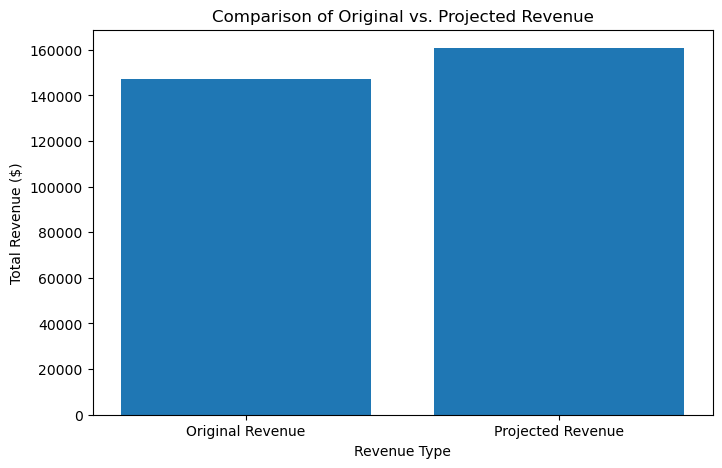

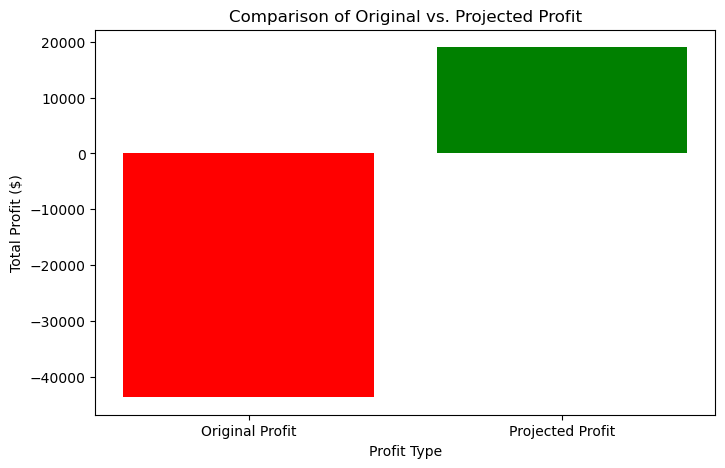

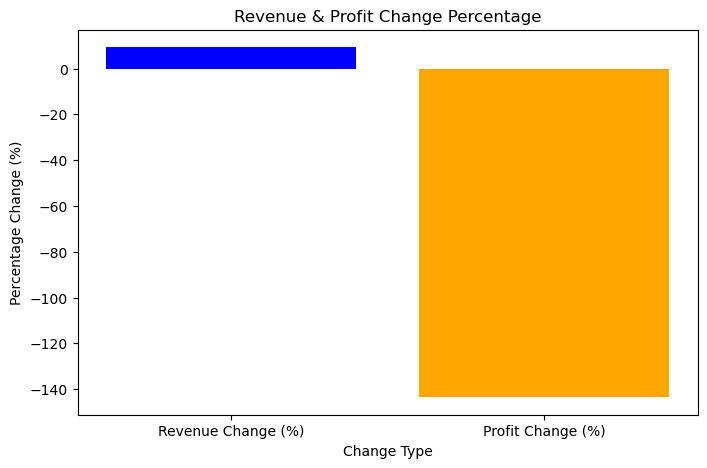

In [ ]:
import matplotlib.pyplot as plt

# Creating a bar chart for revenue comparison
plt.figure(figsize=(8, 5))
plt.bar(["Original Revenue", "Projected Revenue"], [original_revenue, projected_revenue])
plt.xlabel("Revenue Type")
plt.ylabel("Total Revenue ($)")
plt.title("Comparison of Original vs. Projected Revenue")
plt.show()

# Creating a bar chart for profit comparison
plt.figure(figsize=(8, 5))
plt.bar(["Original Profit", "Projected Profit"], [original_total_profit, projected_total_profit], color=["red", "green"])
plt.xlabel("Profit Type")
plt.ylabel("Total Profit ($)")
plt.title("Comparison of Original vs. Projected Profit")
plt.show()

# Creating a bar chart for percentage change in revenue and profit
plt.figure(figsize=(8, 5))
plt.bar(["Revenue Change (%)", "Profit Change (%)"], [revenue_change_percentage, profit_change_percentage], color=["blue", "orange"])
plt.xlabel("Change Type")
plt.ylabel("Percentage Change (%)")
plt.title("Revenue & Profit Change Percentage")
plt.show()
